# **Desafío Final**

Los hogares encabezados por mujeres han ido en aumento en Sudáfrica en los últimos años. En comparación con los hogares encabezados por hombres, los hogares encabezados por mujeres tienden a enfrentar mayores desafíos sociales y económicos. Los hogares encabezados por mujeres, en general, son más vulnerables a menores ingresos familiares y mayores tasas de pobreza.

El censo de Sudáfrica recopila datos sobre la jefatura femenina y los niveles de ingresos de todos los hogares del país cada 10 años. Sin embargo, es importante que los encargados de formular políticas y otros actores tengan estimaciones precisas de estas estadísticas, incluso entre los años del censo. Este desafío explora cómo el aprendizaje automático puede ayudar a mejorar el monitoreo de indicadores clave a nivel de barrio entre los años del censo.

El objetivo de este desafío es construir un modelo predictivo que estime con precisión el porcentaje de hogares por distrito encabezados por mujeres y que viven por debajo de un umbral de ingresos particular, mediante el uso de puntos de datos que se pueden recopilar a través de otros medios sin una encuesta intensiva de hogares como el censo

Esta solución puede reducir potencialmente el costo y mejorar la precisión del seguimiento de los indicadores de población clave, como la jefatura femenina del hogar y el nivel de ingresos entre los años del censo. Las soluciones ganadoras se pondrán a disposición del público al final del concurso.

Instalación de GeoPandas

In [1]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 42 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 2s (1,191 kB/s)
Selecting previously unselected

In [2]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.4 MB/s 
     |████████████████████████████████| 6.3 MB 32.6 MB/s 
     |████████████████████████████████| 16.7 MB 197 kB/s 


In [3]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.4 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [5]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 4.2 MB/s 


In [6]:
pip install --user lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 4.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=2a6bc6900a0c091e824bc95d4fc71c6829dd029083ec85e1ca41ddba2fc11a95
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [7]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 3.4 MB/s 
     |████████████████████████████████| 133 kB 35.8 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=6fd2e11f5cf23e334bbb36ed6f82273c0ae639149a3d38f7e23af19e17000f08
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
import shap  # package used to calculate Shap values
import eli5

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn import metrics
from shapely.geometry import Point
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
import mlxtend
#from mlxtend.plotting import plot_pca_correlation_graph


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#from lime.lime_tabular import LimeTabularExplainer

import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBRegressor
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
import lightgbm as plot_importance

import statsmodels.api as sm
from statsmodels.tools import eval_measures

import geopandas as gpd

import shapely # genera las figuras geometricas
import descartes # relaciona shapely con matplotlib
import pyproj # proyecciones. Transformar coordenadas
import folium

from sklearn.neighbors import KNeighborsRegressor

from shapely.geometry.polygon import Polygon


from google.colab import drive
drive.mount('/content/drive')

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


Mounted at /content/drive


##EDA

### Carga del dataset

In [9]:
data = pd.read_csv('/content/drive/MyDrive/Digital House - Desafío 4 - Grupo 1/Trailblazers Qualification Challenge/data/Train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Digital House - Desafío 4 - Grupo 1/Trailblazers Qualification Challenge/data/Test.csv')
labels_df = pd.read_csv('/content/drive/MyDrive/Digital House - Desafío 4 - Grupo 1/Trailblazers Qualification Challenge/data/variable_descriptions.csv')

In [ ]:
data.shape

(2822, 63)

In [ ]:
data.head()

ward  total_households  total_individuals     target     dw_00  \
0  41601001: Ward 1        1674.45058         5888.20750  16.773757  0.933841   
1  41601002: Ward 2        1736.99230         6735.33812  21.496661  0.696940   
2  41601003: Ward 3        2403.57591         7273.04995  10.931425  0.810545   
3  41601004: Ward 4        1740.78737         5734.49046  23.119257  0.659914   
4  41601005: Ward 5        1730.51451         6657.23835  13.652252  0.950575   

      dw_01     dw_02     dw_03     dw_04     dw_05  ...     pw_03     pw_04  \
0  0.000846  0.005490  0.000676  0.000000  0.001372  ...  0.002848  0.007537   
1  0.001253  0.004402  0.000000  0.002301  0.001323  ...  0.014566  0.057127   
2  0.004517  0.008891  0.003986  0.007735  0.000956  ...  0.057560  0.010358   
3  0.000000  0.006129  0.000000  0.000813  0.037245  ...  0.000000  0.000669   
4  0.000655  0.001473  0.000598  0.006999  0.000818  ...  0.004859  0.001290   

      pw_05     pw_06  pw_07  pw_08  ADM4_PCODE        lat        lon  \
0  0.000000  0.012928      0      0   ZA4161001 -29.682270  24.734743   
1  0.019092  0.004131      0      0   ZA4161002 -29.119311  24.757737   
2  0.001421  0.040881      0      0   ZA4161003 -29.142276  25.094093   
3  0.000000  0.005011      0      0   ZA4161004 -29.372052  24.942867   
4  0.000673  0.017629      0      0   ZA4161005 -29.409381  25.290165   

         NL  
0  0.292039  
1  3.207775  
2  0.000000  
3  2.038778  
4  0.000000  

[5 rows x 63 columns]

### Verificación de valores nulos

In [ ]:
data.isnull().mean()

ward                 0.0
total_households     0.0
total_individuals    0.0
target               0.0
dw_00                0.0
                    ... 
pw_08                0.0
ADM4_PCODE           0.0
lat                  0.0
lon                  0.0
NL                   0.0
Length: 63, dtype: float64

In [ ]:
all(data.isnull().mean()==0)

True

### Descripción de los datos

In [ ]:
data.columns

Index(['ward', 'total_households', 'total_individuals', 'target', 'dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08',
       'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01',
       'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01',
       'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
       'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
       'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03',
       'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05',
       'pw_06', 'pw_07', 'pw_08', 'ADM4_PCODE', 'lat', 'lon', 'NL'],
      dtype='object')

In [ ]:
data.describe()

total_households  total_individuals       target        dw_00  \
count       2822.000000        2822.000000  2822.000000  2822.000000   
mean        3665.281214       12869.130053    24.507554     0.712196   
std         3266.364522        9696.690518    10.294387     0.214035   
min            1.000000         402.000000     0.000000     0.000000   
25%         1778.858235        7071.205695    16.751556     0.594212   
50%         2398.249935        9366.989680    24.156670     0.766841   
75%         3987.080563       14241.233015    32.226553     0.881708   
max        39684.942130       91716.746370    55.528423     0.994962   

             dw_01        dw_02        dw_03        dw_04        dw_05  \
count  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000   
mean      0.092616     0.032043     0.006057     0.008665     0.006289   
std       0.182852     0.080253     0.019374     0.030697     0.024606   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.002895     0.002407     0.000000     0.000000     0.000000   
50%       0.010425     0.005762     0.000807     0.000607     0.000865   
75%       0.068209     0.027913     0.002538     0.002225     0.003027   
max       0.931490     0.951806     0.264239     0.392085     0.435912   

             dw_06  ...        pw_02        pw_03        pw_04        pw_05  \
count  2822.000000  ...  2822.000000  2822.000000  2822.000000  2822.000000   
mean      0.022375  ...     0.127555     0.041589     0.019655     0.011008   
std       0.037127  ...     0.156400     0.057331     0.032926     0.023672   
min       0.000000  ...     0.000000     0.000000     0.000000     0.000000   
25%       0.002716  ...     0.008673     0.002099     0.000715     0.000159   
50%       0.008639  ...     0.069065     0.016496     0.005164     0.001459   
75%       0.025218  ...     0.183384     0.058626     0.025055     0.009432   
max       0.412936  ...     1.000000     0.327393     0.306787     0.228261   

             pw_06   pw_07   pw_08          lat          lon           NL  
count  2822.000000  2822.0  2822.0  2822.000000  2822.000000  2822.000000  
mean      0.110818     0.0     0.0   -26.880740    28.666515    17.437560  
std       0.185401     0.0     0.0     2.021279     2.373809    18.958621  
min       0.000000     0.0     0.0   -32.490089    16.760022     0.000000  
25%       0.005217     0.0     0.0   -28.569019    27.707932     3.033397  
50%       0.025165     0.0     0.0   -26.549866    28.959679     9.205572  
75%       0.116638     0.0     0.0   -25.572130    30.441505    26.890531  
max       0.961523     0.0     0.0   -22.331267    32.858249    63.000000  

[8 rows x 61 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward               2822 non-null   object 
 1   total_households   2822 non-null   float64
 2   total_individuals  2822 non-null   float64
 3   target             2822 non-null   float64
 4   dw_00              2822 non-null   float64
 5   dw_01              2822 non-null   float64
 6   dw_02              2822 non-null   float64
 7   dw_03              2822 non-null   float64
 8   dw_04              2822 non-null   float64
 9   dw_05              2822 non-null   float64
 10  dw_06              2822 non-null   float64
 11  dw_07              2822 non-null   float64
 12  dw_08              2822 non-null   float64
 13  dw_09              2822 non-null   float64
 14  dw_10              2822 non-null   float64
 15  dw_11              2822 non-null   float64
 16  dw_12              2822 

In [ ]:
pct_women_hh = data['target']
pct_women_hh.describe()

count    2822.000000
mean       24.507554
std        10.294387
min         0.000000
25%        16.751556
50%        24.156670
75%        32.226553
max        55.528423
Name: target, dtype: float64

In [ ]:
list_column_groups = [['dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13'],
                      ['psa_00', 'psa_01', 'psa_02', 'psa_03', 'psa_04'],
                      ['stv_00', 'stv_01'],
                      ['car_00', 'car_01'],
                      ['lln_00', 'lln_01'],
                      ['lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11', 'lan_12', 'lan_13', 'lan_14'],
                      ['pg_00','pg_01', 'pg_02', 'pg_03', 'pg_04'],
                      ['pw_00','pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06', 'pw_07', 'pw_08']]

list_labels_groups = [['Brick/concrete','traditional materials',' Flat or apartment','Cluster house in complex', 'Townhouse','Semi-detached house in a complex','House/flat/room in backyard','Informal dwelling shack in backyard)','Informal dwelling in farm', 'Room/flatlet','Caravan/tent','Othe','Unspecified','Not applicable'],
                      ['Yes','No','Do not know','Unspecified','Not applicable'],
                      ['Yes','No'],
                      ['Yes','No'],
                      ['Yes','No'],
                      ['Afrikaans','English','IsiNdebele','IsiXhosa','IsiZulu','Sepedi','Sesotho','Setswana','Sign language','SiSwati','Tshivenda','Xitsonga','Other','Unspecified','Not applicable'],
                      ['Black African','Coloured','Indian or Asian','White','Other'],
                      ['Piped (tap) water inside dwelling','Piped (tap) water inside yard','Piped less than 200m','Piped between 200m and 500m','Piped distance 500m and 1000m','Piped distance greater than 1000m','No access to piped (tap) water','Unspecified','Not applicable']]

list_titles_gropus = ['Dwellings of type','School attendance','Satellite TV','Car','Landline ownership','Language','Population group','Piped water access']

def func(pct):
  return "{:1.1f}%".format(pct)

def pie_graph(data,columns,labels,title,ax,train_or_test,sorted_index=None):

  serie_to_graph = data.loc[:,columns].multiply(data.total_individuals,axis=0).sum(axis=0)
  if sorted_index is None: 
    sorted_index = np.argsort(serie_to_graph.values)[::-1]
  serie_to_graph = serie_to_graph.iloc[sorted_index]
  labels = np.array(labels)[sorted_index]
  #plt.figure(figsize=(10,10))
  ax.pie(serie_to_graph,startangle=180,autopct='%1.1f%%',pctdistance=1.2,textprops={'fontsize': 24})#,labels=labels)#,labeldistance=1.1,autopct=lambda pct: func(pct))
  ax.set_title(label=title+train_or_test,fontsize=24)
  ax.legend(loc=(1,0),labels=labels,prop={'size': 15})
  return sorted_index
  #plt.show()

In [ ]:
titles_2 = [ list_titles_gropus[i] for i in range(len(list_titles_gropus)) for j in range(len(list_labels_groups[i]))]
list_columns = [item for sublist in list_labels_groups for item in sublist]
titles_with_columns = ["{}: {}".format(a, b) for a, b in zip(titles_2, list_columns)]

In [ ]:
columns_translate_dictionary = dict(zip([item for sublist in list_column_groups for item in sublist],titles_with_columns))

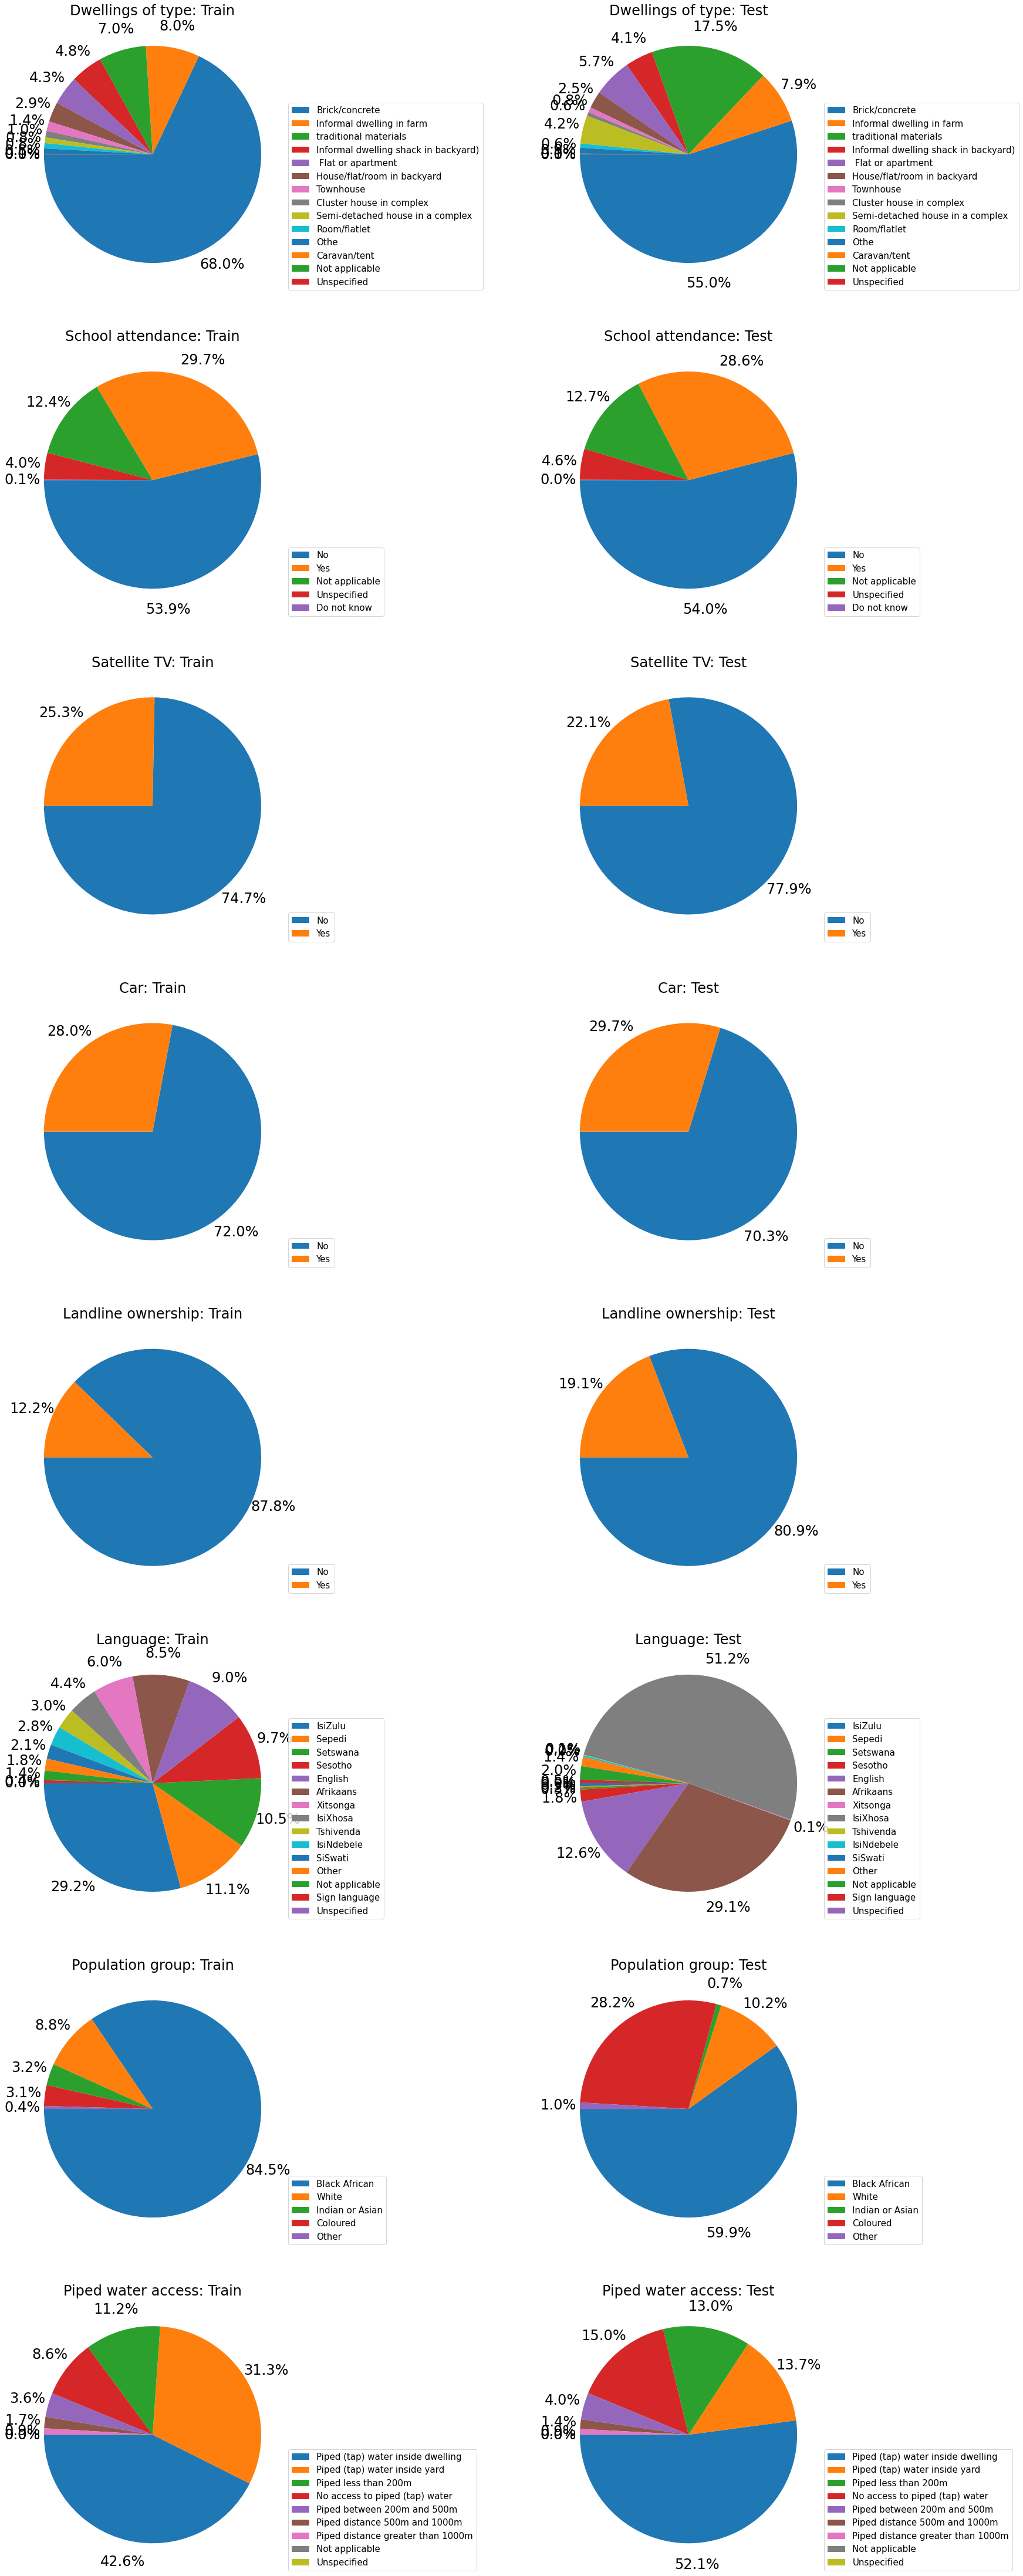

In [ ]:
fig, axes = plt.subplots(nrows=int(np.round(len(list_column_groups))),ncols=2,figsize=(30,80))

for i in range(len(list_column_groups)):
  sorted_index = pie_graph(data,list_column_groups[i],list_labels_groups[i],list_titles_gropus[i],axes.flatten()[i*2],': Train')
  pie_graph(data_test,list_column_groups[i],list_labels_groups[i],list_titles_gropus[i],axes.flatten()[i*2+1],': Test',sorted_index)

In [ ]:
flatten_list_column_groups = [element for sublist in list_column_groups for element in sublist]

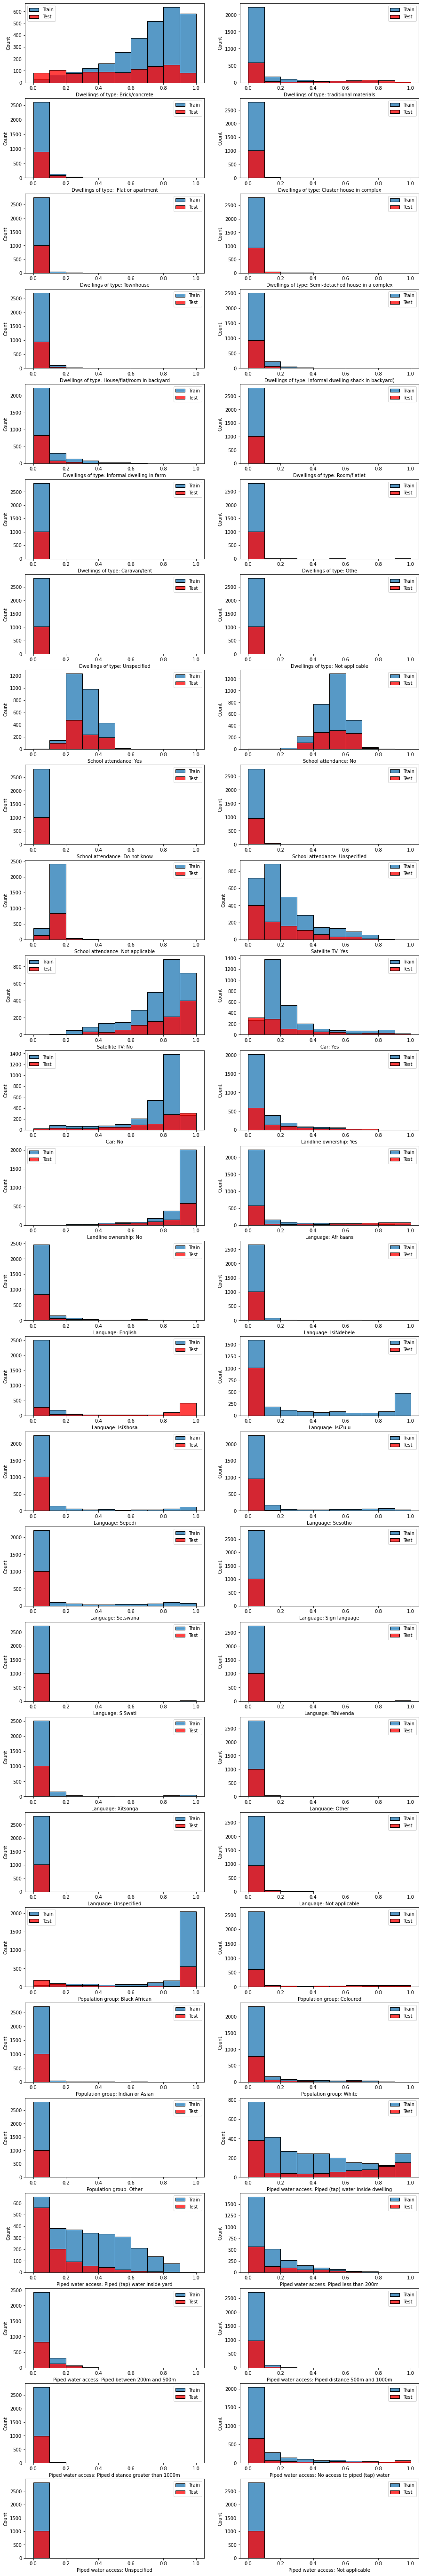

In [ ]:
fig, ax = plt.subplots(nrows=int(len(flatten_list_column_groups)/2), ncols=2, figsize=(15,100))

for i in range(len(flatten_list_column_groups)):
  sns.histplot(data=data[flatten_list_column_groups[i]], ax=ax.flatten()[i],bins=10,binrange=(0,1)).set_xlabel(titles_with_columns[i])
  sns.histplot(data=data_test[flatten_list_column_groups[i]], ax=ax.flatten()[i],color='red',bins=10,binrange=(0,1)).set_xlabel(titles_with_columns[i])
  ax.flatten()[i].legend(['Train', 'Test'])

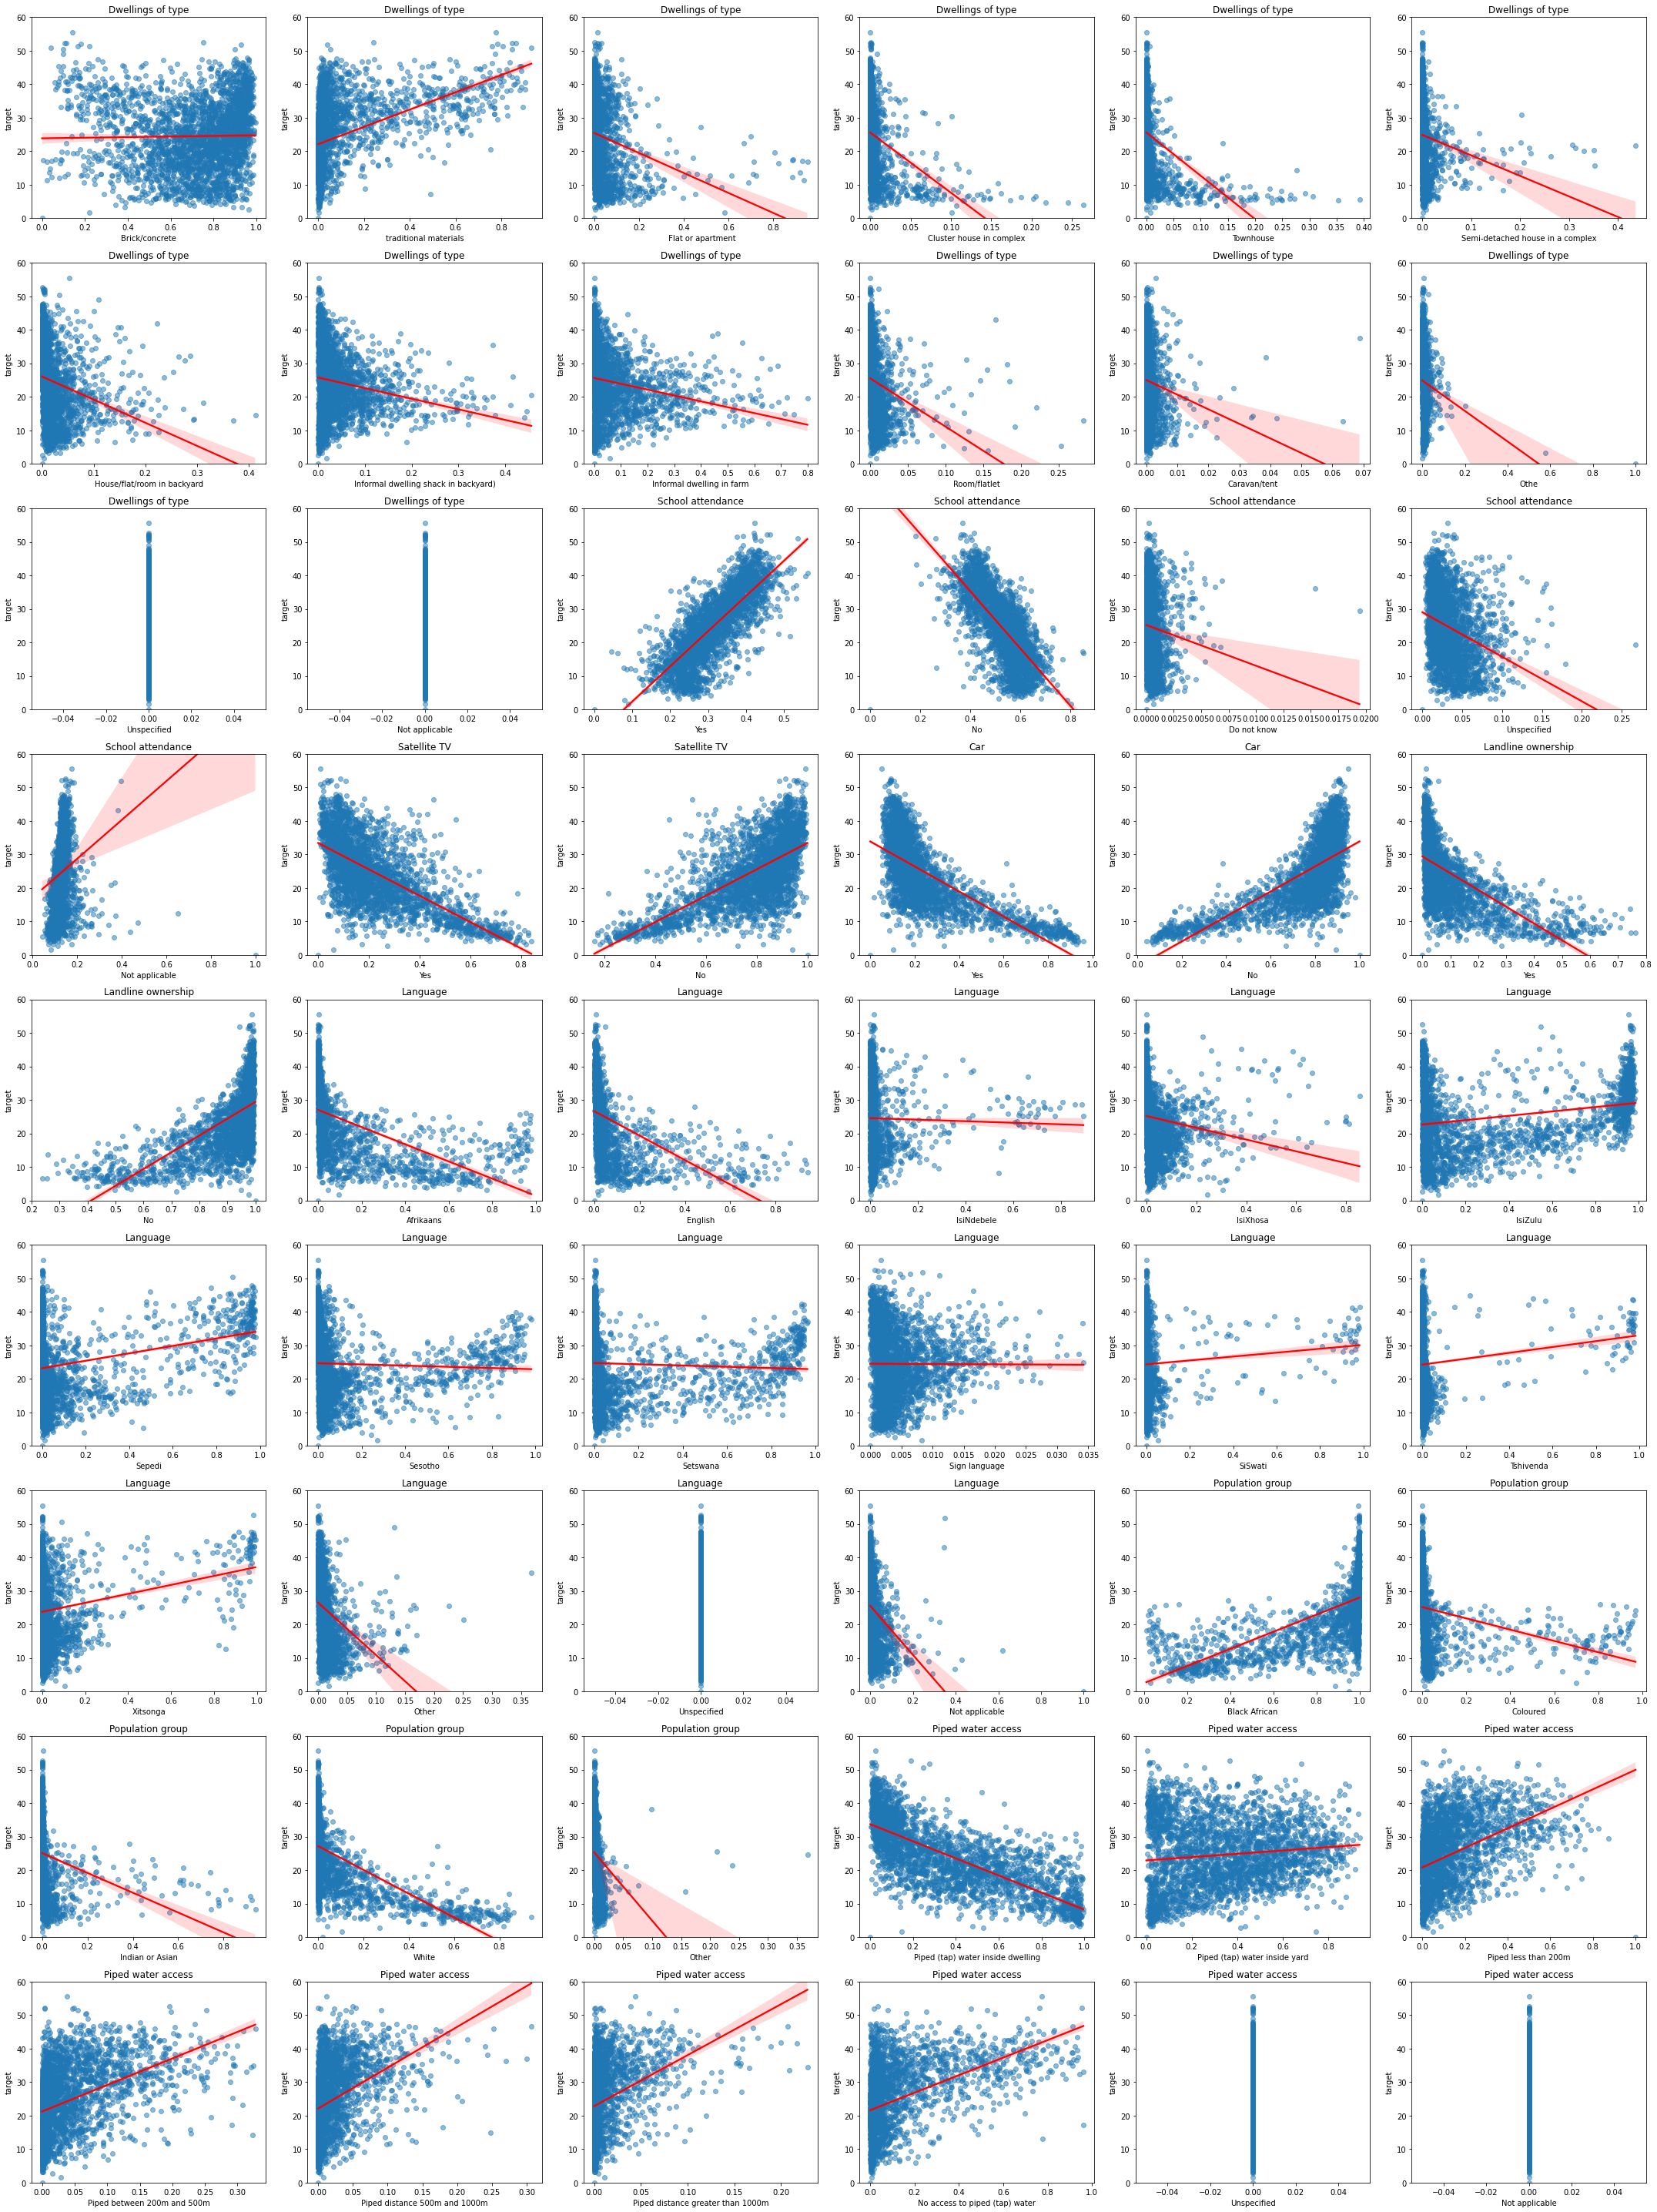

In [ ]:
list_to_plot = [ item for sublist in list_column_groups for item in sublist]
x_labels = [ item for sublist in list_labels_groups for item in sublist]
titles_2 = [ list_titles_gropus[i] for i in range(len(list_titles_gropus)) for j in range(len(list_labels_groups[i]))]
fig, axes = plt.subplots(nrows=int(np.round(len(list_to_plot)/6)),ncols=6,figsize=(30,40))



for i in range(len(list_to_plot)):
  sns.regplot(data=data,y='target',x=list_to_plot[i],scatter_kws={'alpha':0.5},order=1,ax=axes.flatten()[i],line_kws={"color": "red"})
  axes.flatten()[i].set_xlabel(x_labels[i])
  axes.flatten()[i].set_title(titles_2[i])
  axes.flatten()[i].set_ylim((0,60))
plt.tight_layout()

### Datos y geografía

Unimos los datos de train y test

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/Digital House - Desafío 4 - Grupo 1/Trailblazers Qualification Challenge/data/Test.csv')

In [ ]:
data_test.shape

(1013, 62)

In [ ]:
total_data = pd.concat([data,data_test],axis=0)

In [ ]:
total_data.describe()

total_households  total_individuals       target        dw_00  \
count       3835.000000        3835.000000  2822.000000  3835.000000   
mean        3523.034239       12552.886065    24.507554     0.665409   
std         3150.715522        9569.423219    10.294387     0.246614   
min            1.000000         359.881550     0.000000     0.000000   
25%         1735.446115        6911.898170    16.751556     0.520389   
50%         2281.103690        9022.354340    24.156670     0.732733   
75%         3774.160880       13602.342065    32.226553     0.862848   
max        39684.942130       91716.746370    55.528423     0.994962   

             dw_01        dw_02        dw_03        dw_04        dw_05  \
count  3835.000000  3835.000000  3835.000000  3835.000000  3835.000000   
mean      0.133501     0.036257     0.005542     0.007795     0.011874   
std       0.238090     0.080782     0.017389     0.027560     0.042511   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.002970     0.002847     0.000000     0.000000     0.000000   
50%       0.011090     0.008556     0.000859     0.000653     0.001051   
75%       0.118624     0.035710     0.002610     0.002359     0.004420   
max       0.985465     0.951806     0.264239     0.392085     0.742617   

             dw_06  ...        pw_02        pw_03        pw_04        pw_05  \
count  3835.000000  ...  3835.000000  3835.000000  3835.000000  3835.000000   
mean      0.023818  ...     0.133695     0.043760     0.019246     0.010942   
std       0.038561  ...     0.164251     0.060791     0.032062     0.023029   
min       0.000000  ...     0.000000     0.000000     0.000000     0.000000   
25%       0.003340  ...     0.007883     0.001943     0.000683     0.000141   
50%       0.009716  ...     0.068147     0.015811     0.004870     0.001392   
75%       0.026695  ...     0.198175     0.062783     0.024944     0.009898   
max       0.418048  ...     1.000000     0.389603     0.306787     0.228261   

             pw_06   pw_07   pw_08          lat          lon           NL  
count  3835.000000  3835.0  3835.0  3835.000000  3835.000000  3835.000000  
mean      0.134153     0.0     0.0   -28.415347    27.635497    16.438122  
std       0.228252     0.0     0.0     3.155866     3.434569    18.951210  
min       0.000000     0.0     0.0   -34.670197    16.760022     0.000000  
25%       0.005049     0.0     0.0   -30.858571    26.619325     2.001946  
50%       0.023655     0.0     0.0   -27.969031    28.318736     7.815497  
75%       0.136971     0.0     0.0   -25.964556    30.081648    25.410298  
max       0.993841     0.0     0.0   -22.331267    32.858249    63.000000  

[8 rows x 61 columns]

In [ ]:
total_data.shape

(3835, 63)

GeoDF a partir de shapefile a nivel de wards

In [ ]:
geo_shp = gpd.read_file('/content/drive/MyDrive/Digital House - Desafío 4 - Grupo 1/Mapas/SHP/zaf_adm_sadb_ocha_20201109_SHP/zaf_admbnda_adm4_sadb_ocha_20201109.shp')
geo_shp.head()

Shape_Leng  Shape_Area ADM4_EN ADM4_PCODE ADM4_REF ADM4ALT1EN ADM4ALT2EN  \
0    0.253589    0.001676     001  ZA9344001     None       None       None   
1    0.159002    0.000912     002  ZA9344002     None       None       None   
2    0.374324    0.003885     003  ZA9344003     None       None       None   
3    0.206612    0.001345     004  ZA9344004     None       None       None   
4    0.581000    0.009428     005  ZA9344005     None       None       None   

   ADM3_EN ADM3_PCODE ADM2_EN  ... ADM1_PCODE       ADM0_EN ADM0_PCODE  \
0  Makhado     ZA9344  Vhembe  ...        ZA9  South Africa         ZA   
1  Makhado     ZA9344  Vhembe  ...        ZA9  South Africa         ZA   
2  Makhado     ZA9344  Vhembe  ...        ZA9  South Africa         ZA   
3  Makhado     ZA9344  Vhembe  ...        ZA9  South Africa         ZA   
4  Makhado     ZA9344  Vhembe  ...        ZA9  South Africa         ZA   

         date     validOn validTo ADM1_ID ADM2_ID ADM3_ID  \
0  2018-12-27  2020-11-09    None     LIM    DC34  LIM344   
1  2018-12-27  2020-11-09    None     LIM    DC34  LIM344   
2  2018-12-27  2020-11-09    None     LIM    DC34  LIM344   
3  2018-12-27  2020-11-09    None     LIM    DC34  LIM344   
4  2018-12-27  2020-11-09    None     LIM    DC34  LIM344   

                                            geometry  
0  POLYGON ((30.08822 -23.17143, 30.08864 -23.171...  
1  POLYGON ((30.06417 -23.14931, 30.06423 -23.149...  
2  POLYGON ((30.34666 -23.05667, 30.34681 -23.056...  
3  POLYGON ((30.40711 -23.08805, 30.40968 -23.093...  
4  POLYGON ((30.05989 -23.17453, 30.05992 -23.174...  

[5 rows x 22 columns]

In [ ]:
data_pop = total_data

In [ ]:
data_pop.shape

(3835, 63)

GeoDF a partir de la unión del df de estadísticas de households y el geodf de wards, usando como clave la columna ADM4_PCODE

In [ ]:
geo_merge = geo_shp.merge(data_pop, on='ADM4_PCODE')

In [ ]:
type(geo_merge)

geopandas.geodataframe.GeoDataFrame

Agregamos nuevas columnas a geo_merge: area de wards (km2), densidad de población (hab. por km2) y tamaño promedio del hogar

In [ ]:
geo_merge = geo_merge.to_crs(epsg = 3857)
print(geo_merge.crs)

epsg:3857


In [ ]:
m_to_km = 10**6

geo_merge['area_km2'] = geo_merge.geometry.area / m_to_km
geo_merge.head(2)

Shape_Leng  Shape_Area ADM4_EN ADM4_PCODE ADM4_REF ADM4ALT1EN ADM4ALT2EN  \
0    0.253589    0.001676     001  ZA9344001     None       None       None   
1    0.159002    0.000912     002  ZA9344002     None       None       None   

   ADM3_EN ADM3_PCODE ADM2_EN  ...     pw_03     pw_04     pw_05     pw_06  \
0  Makhado     ZA9344  Vhembe  ...  0.128537  0.066868  0.028071  0.045038   
1  Makhado     ZA9344  Vhembe  ...  0.158513  0.090060  0.110805  0.003964   

  pw_07 pw_08        lat       lon        NL   area_km2  
0   0.0   0.0 -23.188822  30.10241  9.517579  22.597512  
1   0.0   0.0 -23.164163  30.06054  7.885448  12.287119  

[2 rows x 85 columns]

In [ ]:
# volvemos al crs 4326
geo_merge = geo_merge.to_crs(epsg = 4326)
print(geo_merge.crs)

epsg:4326


Agregamos columna para desidad de población por ward

In [ ]:
geo_merge['pop_density'] = geo_merge.apply(lambda row : row.total_individuals/row.area_km2, axis=1)

Agregamos columna para tamaño promedio de hogar

In [ ]:
# corregimos outlier (por error de carga) en la var 'total_households'
geo_merge['total_households'] = np.where(geo_merge['total_households']==1, geo_merge['total_households'].quantile(0.10),geo_merge['total_households'])

In [ ]:
geo_merge['avg_household_size'] = geo_merge.apply(lambda row: row.total_individuals/row.total_households, axis=1)

In [ ]:
geo_merge['avg_household_size'].describe()

count    3835.000000
mean        3.856704
std         1.036694
min         1.254742
25%         3.275645
50%         3.743170
75%         4.265754
max        30.692183
Name: avg_household_size, dtype: float64

Choropleth para la variable '% de Asistencia a la escuela: Sí'

Text(375.3228104229877, 0.5, 'latitude')

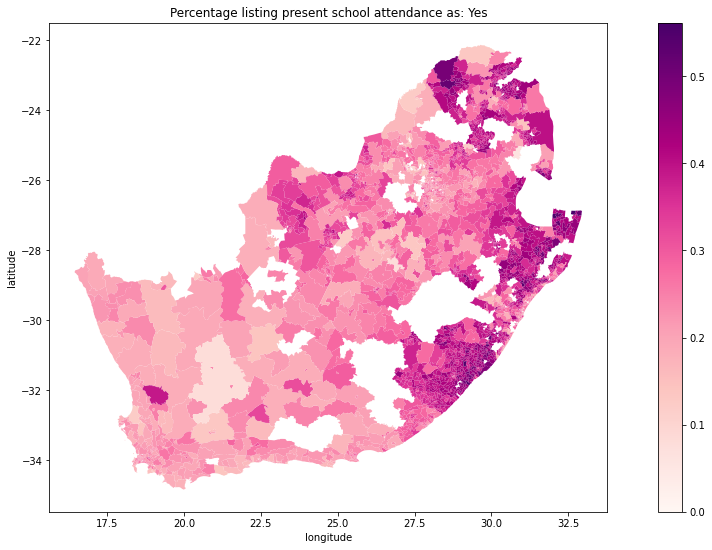

In [ ]:
geo_merge.plot(column='psa_00',legend=True,figsize=(18,9),cmap='RdPu')
plt.title('Percentage listing present school attendance as: Yes')
plt.xlabel('longitude')
plt.ylabel('latitude')

Choropleth para la variable 'Tamaño promedio de grupo familiar'

Text(375.3228104229877, 0.5, 'latitude')

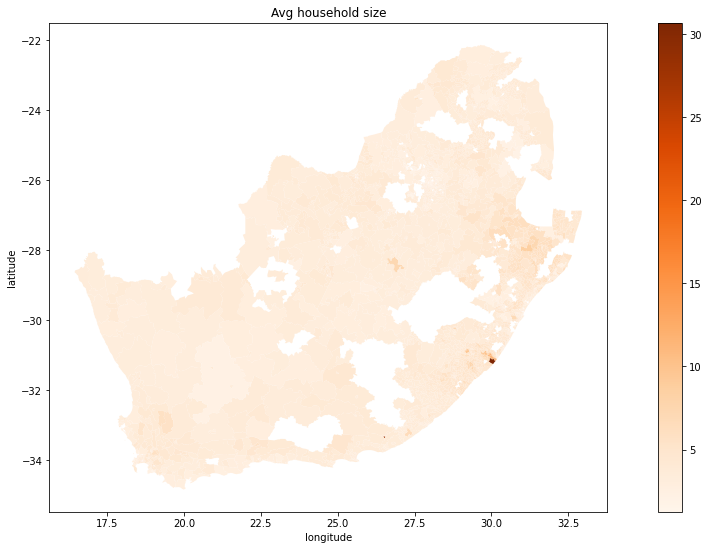

In [ ]:
geo_merge.plot(column='avg_household_size',legend=True,figsize=(18,9),cmap='Oranges')
plt.title('Avg household size')
plt.xlabel('longitude')
plt.ylabel('latitude')

Choropleth para la variable '% de etnia: White'

Text(375.3228104229877, 0.5, 'latitude')

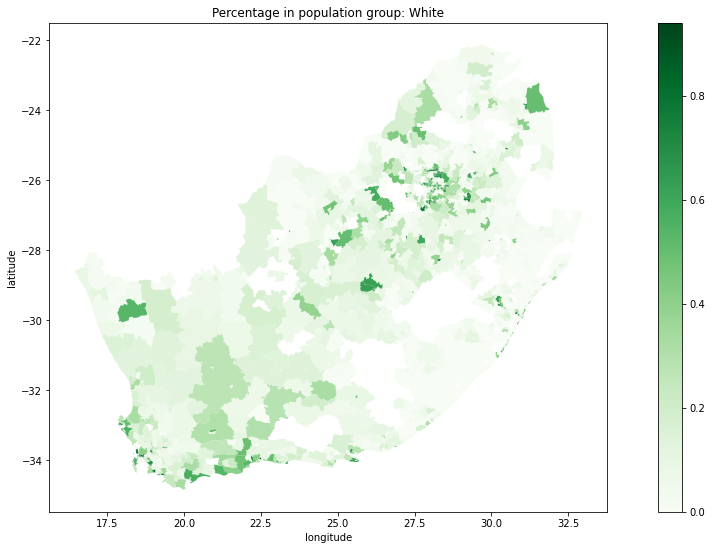

In [ ]:
geo_merge.plot(column='pg_03',legend=True,figsize=(18,9),cmap='Greens')
plt.title('Percentage in population group: White')
plt.xlabel('longitude')
plt.ylabel('latitude')

Choropleth para la variable '% de uso de electricidad para iluminación'

Text(375.3228104229877, 0.5, 'latitude')

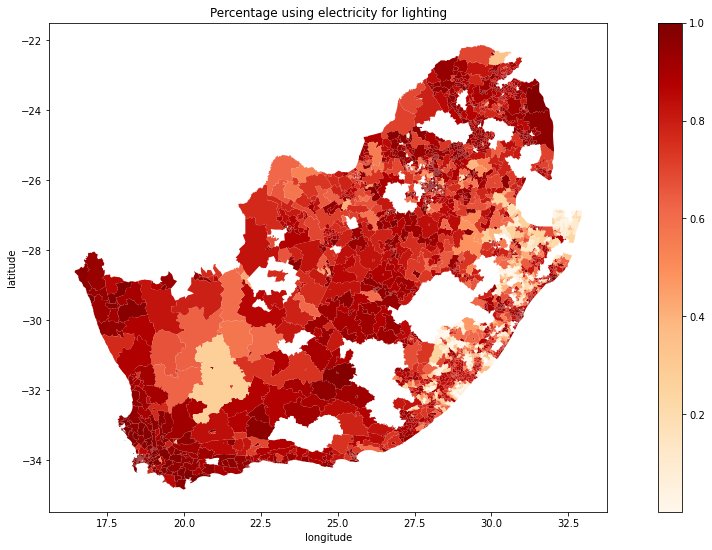

In [ ]:
geo_merge.plot(column='lgt_00',legend=True,figsize=(18,9),cmap='OrRd')
plt.title('Percentage using electricity for lighting')
plt.xlabel('longitude')
plt.ylabel('latitude')

Creamos un Folium Map

In [ ]:
folium_map = folium.Map(location = [-29.366019,25.520656], zoom_start = 6)

GeoDF a partir de archivo GeoJSON

In [ ]:
geo_json = gpd.read_file(('/content/drive/MyDrive/Digital House - Desafío 4 - Grupo 1/Mapas/MDB_Wards_2020.geojson'))
geo_json.head(2)

FID      Province                        Municipali  CAT_B  WardNo  \
0    1  Western Cape  Beaufort West Local Municipality  WC053       1   
1    2  Western Cape  Beaufort West Local Municipality  WC053       2   

        District DistrictCo                       Date    WardID WardLabel  \
0  Central Karoo        DC5  2020-11-24T00:00:00+00:00  10503001   WC053_1   
1  Central Karoo        DC5  2020-11-24T00:00:00+00:00  10503002   WC053_2   

    Shape__Area  Shape__Length  \
0  4.389042e+09  436837.154786   
1  1.162735e+10  849632.681502   

                                            geometry  
0  POLYGON ((23.73449 -31.65457, 23.75649 -31.695...  
1  POLYGON ((22.73510 -31.79938, 22.75750 -31.827...

Agregamos columna 'geometry' al dataset de households

In [ ]:
total_data.columns

Index(['ward', 'total_households', 'total_individuals', 'target', 'dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08',
       'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01',
       'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01',
       'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
       'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
       'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03',
       'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05',
       'pw_06', 'pw_07', 'pw_08', 'ADM4_PCODE', 'lat', 'lon', 'NL'],
      dtype='object')

In [ ]:
data_g = total_data
data_g['geometry'] = data_g.apply(lambda x: Point((x.lon,x.lat)),axis=1)
wards_crs = {'init': 'epsg:4326'}
geo_data = gpd.GeoDataFrame(data_g,crs = wards_crs, geometry=data_g.geometry)
geo_data.geometry = geo_data.geometry.to_crs(epsg = 4326)

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


Spatial join entre poligonos de wards y sus puntos centrales. Polígonos contienen puntos

In [ ]:
json_wards_contains = gpd.sjoin(geo_json, geo_data, op='contains')
json_wards_contains.head(2)

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.


FID      Province                        Municipali  CAT_B  WardNo  \
0    1  Western Cape  Beaufort West Local Municipality  WC053       1   
1    2  Western Cape  Beaufort West Local Municipality  WC053       2   

        District DistrictCo                       Date    WardID WardLabel  \
0  Central Karoo        DC5  2020-11-24T00:00:00+00:00  10503001   WC053_1   
1  Central Karoo        DC5  2020-11-24T00:00:00+00:00  10503002   WC053_2   

   ...     pw_03     pw_04    pw_05     pw_06 pw_07  pw_08  ADM4_PCODE  \
0  ...  0.002291  0.000000  0.00000  0.006154   0.0    0.0   ZA1053001   
1  ...  0.015787  0.034173  0.03411  0.011202   0.0    0.0   ZA1053002   

         lat        lon       NL  
0 -31.894497  23.741508  0.42192  
1 -32.342894  23.095857  0.00000  

[2 rows x 77 columns]

In [ ]:
json_wards_contains.shape

(3835, 77)

Scatterplot de puntos centrales de wards sobre mapa

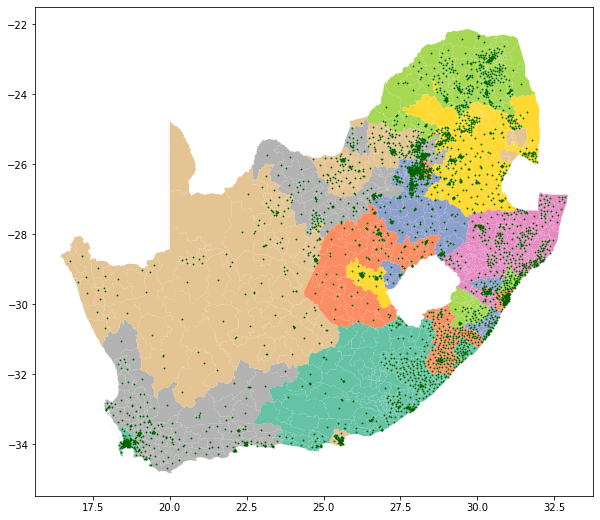

In [ ]:
ax=geo_json.plot(column='WardLabel',cmap='Set2',figsize=(18,9))
geo_data.plot(ax=ax,markersize=1,marker='p',c='darkgreen')
plt.show()

Folium map para porcentaje de población Black African

In [ ]:
# folium_map.choropleth(
# geo_data = json_wards_contains,
# name = 'geometry',
# data = json_wards_contains,
# columns = ['WardID','pg_00'],
# key_on = 'feature.properties.WardID',
# fill_color = 'RdPu',
# fill_opacity = 0.75,
# line_opacity = 0.5,
# legend_name = 'Percentage in population group: Black African'
# )

In [ ]:
# folium.LayerControl().add_to(folium_map)
# display(folium_map)

### Relación entre target y features

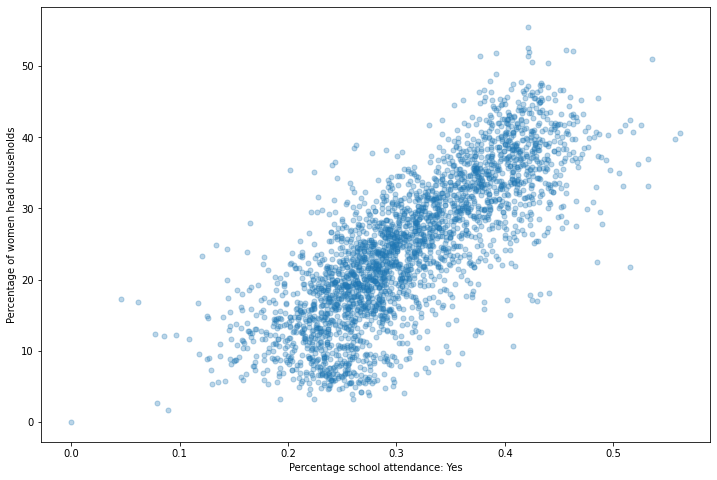

In [ ]:
# pct of women head households vs school attendance (Yes)
school_y = data['psa_00']
plt.figure(figsize=(12,8))
plt.plot(school_y,pct_women_hh,'o',markersize=5,alpha=0.3)
plt.xlabel('Percentage school attendance: Yes')
plt.ylabel('Percentage of women head households')
plt.show()

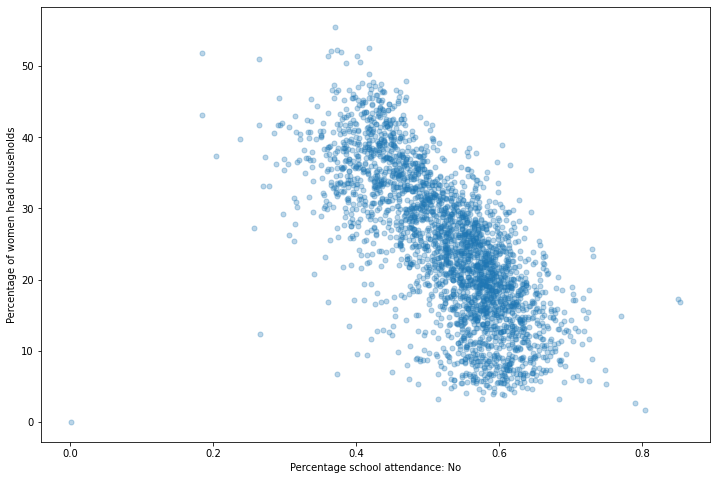

In [ ]:
# pct of women head households vs school attendance (No)
school_n = data['psa_01']
plt.figure(figsize=(12,8))
plt.plot(school_n,pct_women_hh,'o',markersize=5,alpha=0.3)
plt.xlabel('Percentage school attendance: No')
plt.ylabel('Percentage of women head households')
plt.show()

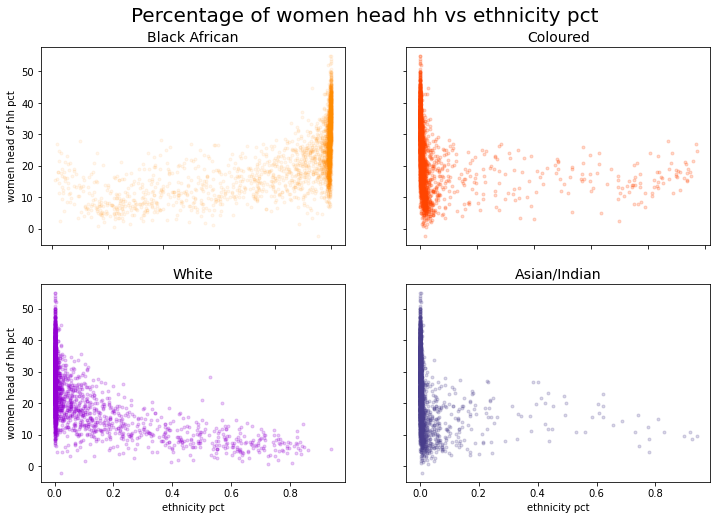

In [ ]:
# pct of women head households vs ethnicity pct per ward
black_african = data['pg_00']
coloured = data['pg_01']
white = data['pg_03']
asian = data['pg_02']
pct_women_jitter  = pct_women_hh + np.random.normal(0,2,size=len(data))
fig, axs = plt.subplots(2,2,figsize=(12,8))
fig.suptitle("Percentage of women head hh vs ethnicity pct",fontsize=20,y=0.95)
axs[0,0].plot(black_african,pct_women_jitter,'o',color='darkorange',alpha=0.07, markersize=3)
axs[0,0].set_title('Black African',fontsize=14)
axs[0,1].plot(coloured,pct_women_jitter,'o',color='orangered',alpha=0.2, markersize=3)
axs[0,1].set_title('Coloured',fontsize=14)
axs[1,0].plot(white,pct_women_jitter,'o',color='darkviolet',alpha=0.2, markersize=3)
axs[1,0].set_title('White',fontsize=14)
axs[1,1].plot(asian,pct_women_jitter,'o',color='darkslateblue',alpha=0.2, markersize=3)
axs[1,1].set_title('Asian/Indian',fontsize=14)

for ax in axs.flat:
    ax.set(xlabel='ethnicity pct', ylabel='women head of hh pct')

for ax in axs.flat:
    ax.label_outer()

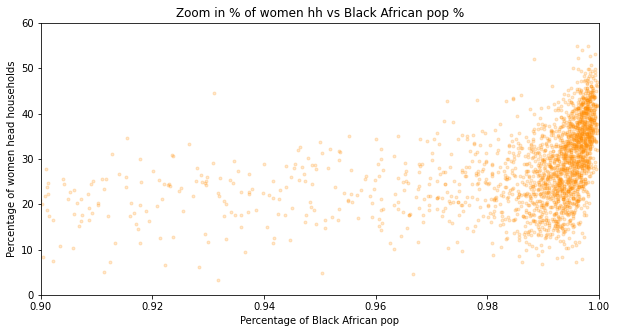

In [ ]:
# zoom in % of women hh vs Black African % 
plt.figure(figsize=(10,5))
plt.plot(black_african,pct_women_jitter,'o',color='darkorange',alpha=0.2, markersize=3)
plt.axis([0.9,1.0,0,60])
plt.title('Zoom in % of women hh vs Black African pop %')
plt.xlabel('Percentage of Black African pop')
plt.ylabel('Percentage of women head households')
plt.show()

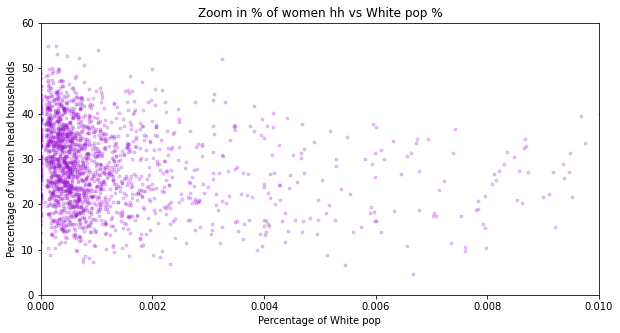

In [ ]:
# zoom in % of women hh vs White % 
plt.figure(figsize=(10,5))
plt.plot(white,pct_women_jitter,'o',color='darkviolet',alpha=0.2, markersize=3)
plt.axis([0.0,0.01,0,60])
plt.title('Zoom in % of women hh vs White pop %')
plt.xlabel('Percentage of White pop')
plt.ylabel('Percentage of women head households')
plt.show()

[Text(0, 0.5, 'women head of hh pct'), Text(0.5, 0, 'no access pct')]

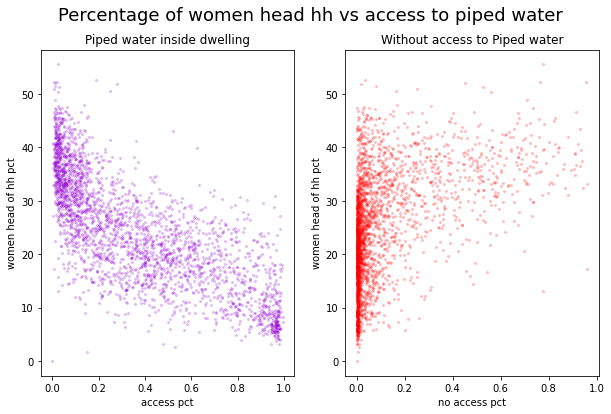

In [ ]:
# piped water access
water_full_access = data['pw_00']
water_no_access = data['pw_06']
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
fig.suptitle('Percentage of women head hh vs access to piped water',fontsize=18)
ax1.plot(water_full_access,pct_women_hh,'o',color='darkviolet',alpha=0.2, markersize=2)
ax1.set_title('Piped water inside dwelling')
ax1.set(xlabel='access pct', ylabel='women head of hh pct')
ax2.plot(water_no_access,pct_women_hh,'o',color='red',alpha=0.2, markersize=2)
ax2.set_title('Without access to Piped water')
ax2.set(xlabel='no access pct', ylabel='women head of hh pct')

[Text(0, 0.5, 'women head of hh pct'), Text(0.5, 0, 'informal dwell pct')]

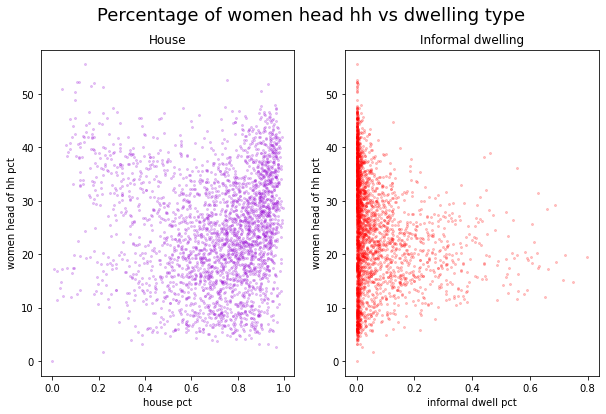

In [ ]:
# dwelling type access
house = data['dw_00']
informal_dwell = data['dw_08']
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
fig.suptitle('Percentage of women head hh vs dwelling type',fontsize=18)
ax1.plot(house,pct_women_hh,'o',color='darkviolet',alpha=0.2, markersize=2)
ax1.set_title('House')
ax1.set(xlabel='house pct', ylabel='women head of hh pct')
ax2.plot(informal_dwell,pct_women_hh,'o',color='red',alpha=0.2, markersize=2)
ax2.set_title('Informal dwelling')
ax2.set(xlabel='informal dwell pct', ylabel='women head of hh pct')

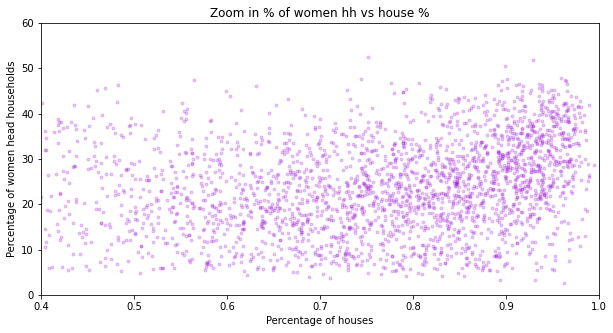

In [ ]:
# zoom in % of women hh vs house % 
plt.figure(figsize=(10,5))
plt.plot(house,pct_women_hh,'o',color='darkviolet',alpha=0.2, markersize=3)
plt.axis([0.4,1.0,0,60])
plt.title('Zoom in % of women hh vs house %')
plt.xlabel('Percentage of houses')
plt.ylabel('Percentage of women head households')
plt.show()

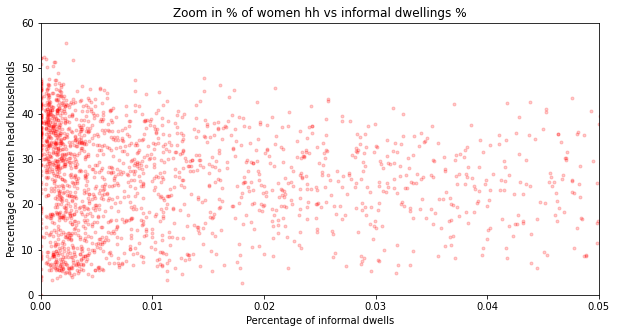

In [ ]:
# zoom in % of women hh vs informal dwells % 
plt.figure(figsize=(10,5))
plt.plot(informal_dwell,pct_women_hh,'o',color='red',alpha=0.2, markersize=3)
plt.axis([0,0.05,0,60])
plt.title('Zoom in % of women hh vs informal dwellings %')
plt.xlabel('Percentage of informal dwells')
plt.ylabel('Percentage of women head households')
plt.show()

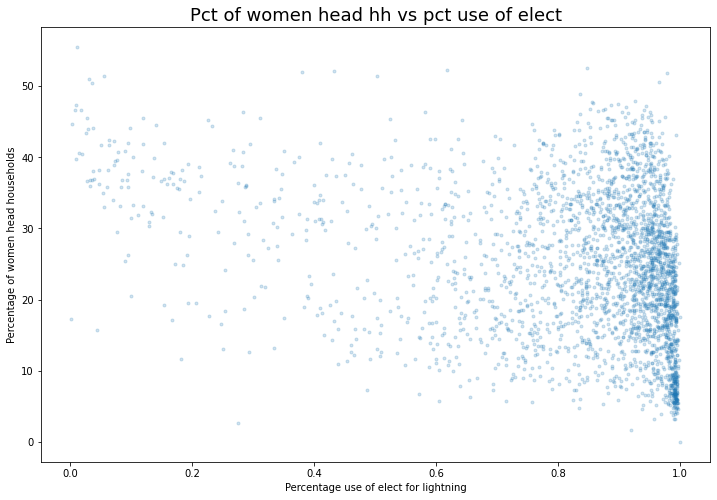

In [ ]:
# electricity access
electricity = data['lgt_00']
plt.figure(figsize=(12,8))
plt.plot( electricity,pct_women_hh,'o',markersize=3,alpha=0.2)
plt.title('Pct of women head hh vs pct use of elect', fontsize=18)
plt.xlabel('Percentage use of elect for lightning')
plt.ylabel('Percentage of women head households')
plt.show()

[Text(0.5, 1.0, 'Target vs Night light')]

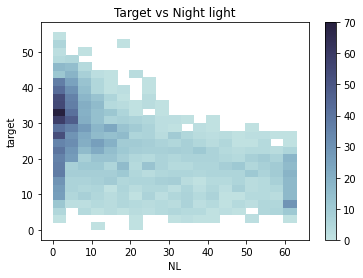

In [ ]:
# Bivariate histplot % women_headed hh and Nightlights value for the area around
sns.histplot(x='NL',y='target',data=data,cbar=True,cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)).set(title='Target vs Night light')

[Text(0.5, 1.0, 'Pct of women-headed HH')]

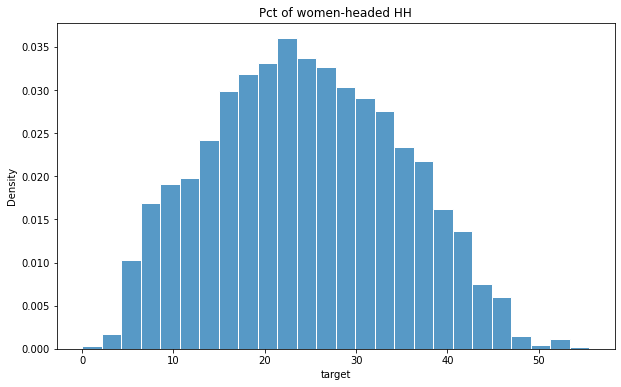

In [ ]:
# hist % women-headed hh
fig,ax=plt.subplots(figsize=(10,6))
sns.set_style('darkgrid')
sns.histplot(pct_women_hh,stat='density').set(title='Pct of women-headed HH')

[Text(0.5, 1.0, 'Population Distribution in wards')]

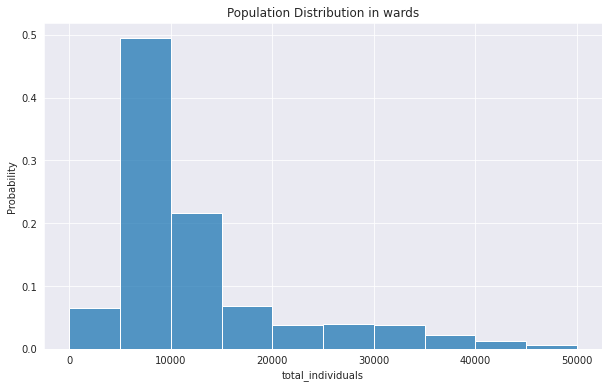

In [ ]:
# hist % women-headed hh
fig,ax=plt.subplots(figsize=(10,6))
sns.set_style('darkgrid')
sns.histplot(x='total_individuals',data=data,stat='probability',binwidth=5000,binrange=(0,50000)).set(title='Population Distribution in wards')

In [ ]:
data['total_individuals'].describe()

count     2822.000000
mean     12869.130053
std       9696.690518
min        402.000000
25%       7071.205695
50%       9366.989680
75%      14241.233015
max      91716.746370
Name: total_individuals, dtype: float64

### **`PCA`**

Datos a utilizar

In [ ]:
X = data

feature_names = ['target', 'dw_00','dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08','dw_09', 'dw_10', 'dw_11', 'psa_00', 'psa_01',
                 'stv_00', 'stv_01', 'car_00', 'car_01',
                 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
                 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
                 'lan_12', 'pg_00', 'pg_01', 'pg_02', 'pg_03',
                 'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05',
                 'pw_06']

X_norm = X[feature_names]
X_norm = X_norm[feature_names].astype('float')
scaler = StandardScaler()
#scaler.fit(X_train)
#scaler.fit(X_test)
X_train_scaled = scaler.fit_transform(X_norm)

Círculo de correlación de variable

In [ ]:
std_sclr = StandardScaler()
df_std = pd.DataFrame(std_sclr.fit_transform(X_norm), index=X_norm.index, columns=X_norm.columns)

Realizar PCA

In [ ]:
pca_arrests = PCA()
pca_arrests.fit(df_std)

PCA()

In [ ]:
pca_loadings = pd.DataFrame(pca_arrests.components_.T, index= df_std.columns)
pca_loadings

0         1         2         3         4         5         6   \
target -0.235713  0.128861 -0.110151 -0.082421 -0.003641 -0.062687  0.083142   
dw_00   0.024256 -0.125084 -0.493576 -0.059074  0.082410 -0.077516  0.119122   
dw_01  -0.126763  0.272469  0.268100 -0.130319  0.121769 -0.032245 -0.050667   
dw_02   0.090945  0.116052  0.161166 -0.043959 -0.131061  0.184156  0.062798   
dw_03   0.158260  0.148755  0.038644 -0.022772 -0.161944 -0.041451 -0.231725   
dw_04   0.175603  0.148624  0.003939 -0.026591 -0.104514 -0.063283 -0.302197   
dw_05   0.050929 -0.042685  0.070107  0.049933  0.079535  0.023037  0.380870   
dw_06   0.049701 -0.086941  0.126145 -0.050351 -0.142623  0.208374 -0.007085   
dw_07  -0.013199 -0.271628  0.177439  0.114143 -0.169912 -0.009554 -0.075141   
dw_08  -0.011956 -0.173510  0.211882  0.293839 -0.092105 -0.021190 -0.107954   
dw_09   0.060953 -0.019800  0.041888  0.033142 -0.055015  0.257198 -0.077090   
dw_10   0.029515  0.009273  0.049484  0.112932  0.188552  0.083378 -0.040369   
dw_11   0.003862 -0.018091  0.081406  0.085865  0.024179  0.018221  0.040723   
psa_00 -0.177915  0.233182 -0.159293 -0.213098  0.026731 -0.041076  0.020676   
psa_01  0.163229 -0.266190  0.094805  0.199223 -0.039140  0.000716 -0.008489   
stv_00  0.255793  0.051150 -0.122999 -0.086022 -0.045895 -0.069831 -0.040375   
stv_01 -0.255793 -0.051150  0.122999  0.086022  0.045895  0.069831  0.040375   
car_00  0.266613  0.106520 -0.068288 -0.037880 -0.009833 -0.035207 -0.103369   
car_01 -0.266613 -0.106520  0.068288  0.037880  0.009833  0.035207  0.103369   
lln_00  0.261307  0.117324  0.016889 -0.024962 -0.041659 -0.077979  0.115260   
lln_01 -0.261307 -0.117324 -0.016889  0.024962  0.041659  0.077979 -0.115260   
lan_00  0.176627  0.010763 -0.021296  0.177616  0.462034 -0.008980 -0.092430   
lan_01  0.198018  0.137756  0.085851  0.021972 -0.237400 -0.018656  0.313172   
lan_02 -0.014445 -0.065081 -0.057619 -0.087373 -0.033706  0.271924 -0.040149   
lan_03  0.013363 -0.144692  0.171515  0.042767 -0.050843 -0.115737 -0.022514   
lan_04 -0.089646  0.184325  0.297430 -0.232521  0.065099  0.045411  0.057723   
lan_05 -0.055680  0.008039 -0.278191 -0.005021 -0.086959  0.242646 -0.009447   
lan_06  0.003794 -0.249332  0.063679 -0.166773 -0.034876 -0.428947 -0.031082   
lan_07 -0.027931 -0.103907 -0.052693  0.266056 -0.084405 -0.073570 -0.096033   
lan_08 -0.016369 -0.192392  0.174139 -0.169236 -0.000741 -0.453548  0.011619   
lan_09 -0.017968  0.014430 -0.098880 -0.064162  0.010113  0.084099 -0.011997   
lan_10 -0.019622  0.042204 -0.133629  0.058673 -0.079690 -0.001921  0.006684   
lan_11 -0.046654  0.027278 -0.184616  0.100909 -0.104459  0.047485  0.014010   
lan_12  0.097145 -0.022627  0.096229  0.126597 -0.233141  0.330218 -0.071910   
pg_00  -0.238960 -0.087777 -0.020432 -0.154136 -0.257706  0.011047 -0.083962   
pg_01   0.076198 -0.044816  0.011480  0.208720  0.515701  0.060920  0.186809   
pg_02   0.111288  0.085166  0.084065  0.043205 -0.207308 -0.021655  0.573767   
pg_03   0.229035  0.126963 -0.022402  0.020781  0.034567 -0.066640 -0.299589   
pg_04   0.076882 -0.003194  0.061224  0.142699  0.061493  0.144701  0.017103   
lgt_00  0.112179 -0.183113 -0.309621 -0.086787 -0.114328  0.005139  0.088220   
pw_00   0.251949 -0.035672  0.025619 -0.096922 -0.003594 -0.037564  0.050878   
pw_01  -0.075974 -0.324989 -0.050591 -0.146561  0.047373  0.152859 -0.015677   
pw_02  -0.136877  0.148842 -0.063819  0.324438 -0.108582 -0.144671  0.001467   
pw_03  -0.133033  0.179518 -0.071594  0.340359 -0.118033 -0.174118 -0.015694   
pw_04  -0.113975  0.183180 -0.083795  0.294663 -0.106011 -0.140886  0.005493   
pw_05  -0.096039  0.178684 -0.074350  0.187481 -0.053636 -0.105154  0.007641   
pw_06  -0.127680  0.236975  0.122851 -0.108967  0.099208  0.080912 -0.061878   

              7         8         9   ...        37        38        39  \
target -0.068555 -0.148469  0.072712  ...  0.146181  0.313815  0.017718   
dw_00   0.043870  0.065

In [ ]:
df_pca = pd.DataFrame(pca_arrests.fit_transform(df_std),
                      index=df_std.index)
df_pca.head()

0         1         2         3         4         5         6   \
0  2.826041 -1.121157 -0.784858  1.269021  4.682397 -0.163892  0.677955   
1  0.145246 -1.570546 -0.121689  1.977431  2.941987  0.282155 -0.023399   
2  1.542612 -1.828982  0.172279  1.669272  1.913202 -0.433326 -0.565595   
3  0.599966 -2.229123  0.602236  1.298355  2.796087  0.210509  0.589970   
4  2.705988 -0.998915 -0.934065 -0.142663  1.595777 -0.495065 -0.175483   

         7         8         9   ...        37        38        39        40  \
0 -0.637044 -0.014349  0.045883  ... -0.130214 -0.297448  0.511222  0.019481   
1 -0.229846 -1.064654 -0.498774  ...  0.068289 -0.609901  1.936644  0.067843   
2  0.472250 -0.243466 -0.214140  ... -0.009003 -0.206482  0.807813  0.002484   
3 -0.419587 -0.702905 -0.144076  ... -0.220495 -0.445999  1.515645  0.055307   
4 -0.295861  0.764350 -0.095365  ...  1.122016  0.103464  0.638766  0.105316   

             41            42            43            44            45  \
0  9.333455e-10  7.551876e-11  7.720393e-10  2.287141e-13  3.900205e-14   
1  7.166813e-10  1.555857e-09  2.181604e-09 -7.374784e-14  7.428504e-15   
2 -3.198328e-10  1.154947e-10  5.466883e-10  3.660604e-13 -2.781277e-15   
3  1.495752e-09  3.258196e-10  2.161403e-09  4.782102e-14  8.526368e-16   
4  4.457881e-10  1.661009e-09  7.428809e-10  4.573065e-13 -2.371062e-16   

             46  
0  1.786159e-15  
1  1.228724e-15  
2 -5.630534e-16  
3  1.035219e-15  
4 -5.689960e-16  

[5 rows x 47 columns]

In [ ]:
df_pca = df_pca.iloc[:,[0,1]]
df_pca

0         1
0     2.826041 -1.121157
1     0.145246 -1.570546
2     1.542612 -1.828982
3     0.599966 -2.229123
4     2.705988 -0.998915
...        ...       ...
2817  6.811368  0.836770
2818  1.406437 -2.216110
2819  3.236817 -0.920192
2820  2.916130 -1.019191
2821 -0.040975 -3.433364

[2822 rows x 2 columns]

In [ ]:
df_pca.rename(columns={'0':'PC1',
                       '1':'PC2'},
               inplace=True)
print(df_pca.columns)

Int64Index([0, 1], dtype='int64')


Representación simultánea individuos y variables.

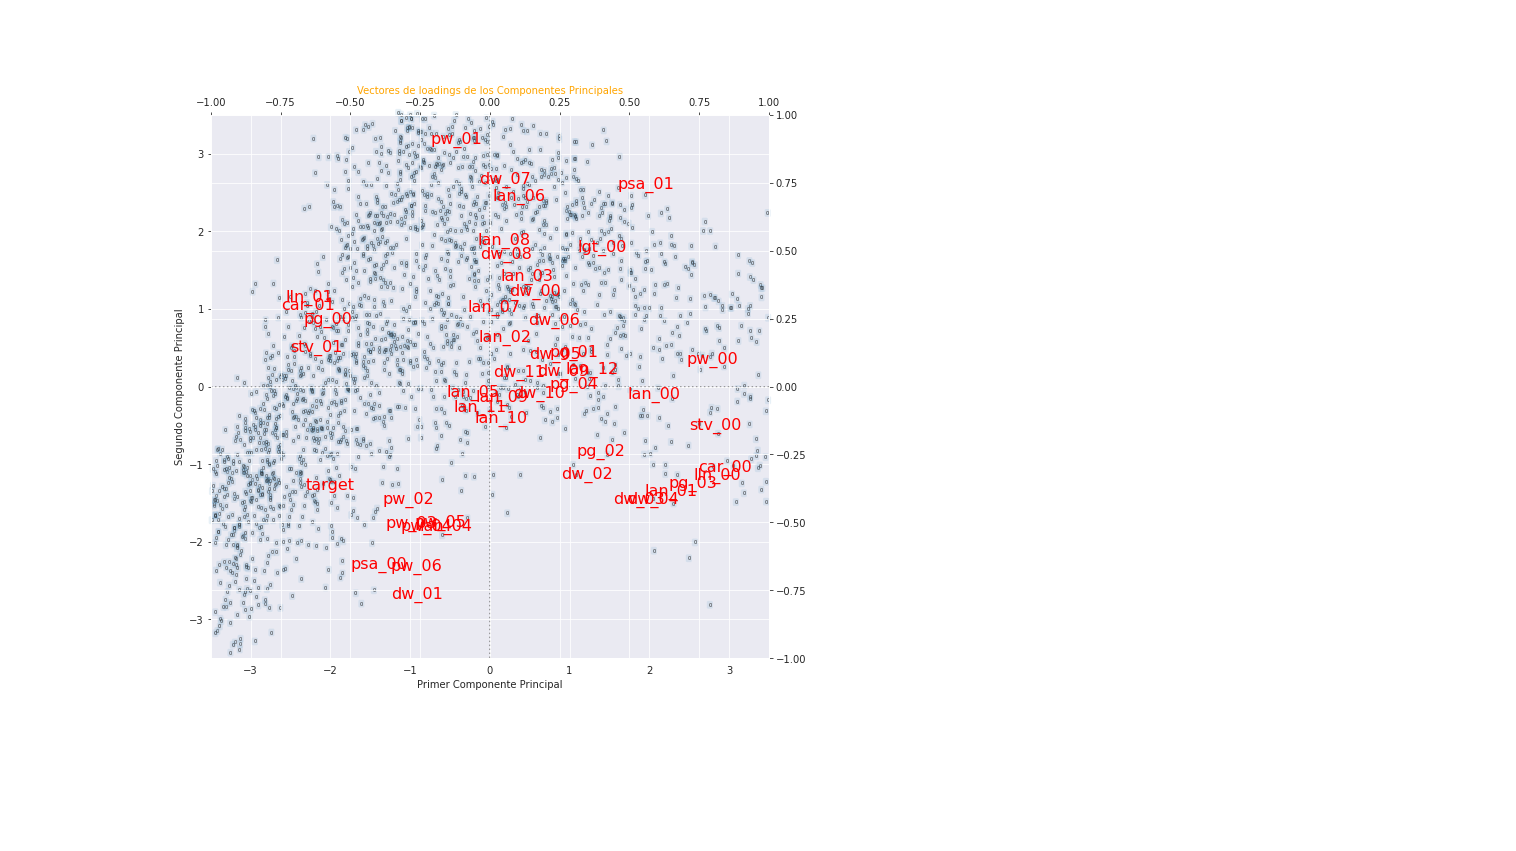

In [ ]:
fig , ax1 = plt.subplots(figsize=(10,10))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Ploteamos a los Estados en el espacio de los Componentes Principales 1 y 2
for i in df_pca.index:
    ax1.annotate(0, (df_pca.iloc[i,0], -df_pca.iloc[i,1]), ha='center',arrowprops = dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1), size=5, bbox=dict(boxstyle="round", alpha=0.1))

# Ploteamos las líneas de referencia
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('Primer Componente Principal')
ax1.set_ylabel('Segundo Componente Principal')
    
# Creamos ejes secundarios
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Vectores de loadings de los Componentes Principales', color='orange')

# Ploteamos a las variables originales en relación a los Componentes Principales 1 y 2
for i in pca_loadings.iloc[:,[0,1]].index:
    ax2.annotate(i, (2.8*pca_loadings.loc[i,0], -2.8*(pca_loadings.loc[i,1])), color='red', size = 16,horizontalalignment='left',verticalalignment='center',
                arrowprops = dict(facecolor='blue', shrink=0.1), rotation_mode="anchor")


In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print((pca_arrests.explained_variance_ratio_))

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[2.57668214e-01 9.26586106e-02 6.34851787e-02 5.20622298e-02
 4.45380541e-02 3.75856415e-02 3.20431835e-02 2.73778360e-02
 2.54287323e-02 2.39856064e-02 2.32182187e-02 2.25050891e-02
 2.14947943e-02 2.14852975e-02 2.07422835e-02 1.93246882e-02
 1.83726281e-02 1.81508661e-02 1.77208174e-02 1.70774189e-02
 1.68341095e-02 1.54474808e-02 1.34949365e-02 1.16931136e-02
 1.09887656e-02 1.02145787e-02 9.38529316e-03 8.26632189e-03
 7.47667897e-03 6.87938479e-03 5.97519724e-03 5.90416686e-03
 5.24360077e-03 3.91094251e-03 3.64681334e-03 2.69255795e-03
 1.84869041e-03 1.75878939e-03 1.12480123e-03 2.67150164e-04
 2.12377400e-05 2.84659210e-18 3.78159164e-19 3.26634976e-19
 9.90513100e-25 5.08160952e-32 1.64229871e-33]


Los municipios con un mayor porcentaje de mujeres cabeza de hogar con ingresos inferiores a R19.6k se caracterizan por:


psa_00: Porcentaje que indica la asistencia actual a la escuela como: Sí
pw_02: Agua entubada (del grifo) en puesto comunitario: distancia inferior a 200 m de la vivienda/institución
pw_03: Agua entubada (del grifo) en puesto comunitario: distancia entre 200 m y 500 m de la vivienda/institución
pw_04: Agua entubada (del grifo) en puesto comunitario: distancia entre 500 m y 1000 m (1 km) de la vivienda/institución
pw_05: Agua entubada (del grifo) en puesto comunitario: distancia superior a 1000 m (1 km) de la vivienda/institución
pw_06: Sin acceso a agua entubada (del grifo)
dw_01: Porcentaje de viviendas de tipo: Tradicional
lan_04:Porcentaje de idioma de listado como: IsiZulu
lan_05:Porcentaje de idioma de listado como: Sepedi
lan_09: Porcentaje de idioma de listado como: SiSwati
lan_10: Porcentaje de idioma de listado como: Tshivenda
lan_11: Porcentaje de idioma de listado como: Xitsonga

lln01:Porcentaje de propietarios de teléfonos fijos como:  No
car01: Percentage of households with a car:  No
pg_00: Porcentaje en el grupo de población  Africanos negros
stv_01: Porcentaje de hogares con televisión por satélite:  No

In [ ]:
pca_loadings

0         1         2         3         4         5         6   \
target -0.235713  0.128861 -0.110151 -0.082421 -0.003641 -0.062687  0.083142   
dw_00   0.024256 -0.125084 -0.493576 -0.059074  0.082410 -0.077516  0.119122   
dw_01  -0.126763  0.272469  0.268100 -0.130319  0.121769 -0.032245 -0.050667   
dw_02   0.090945  0.116052  0.161166 -0.043959 -0.131061  0.184156  0.062798   
dw_03   0.158260  0.148755  0.038644 -0.022772 -0.161944 -0.041451 -0.231725   
dw_04   0.175603  0.148624  0.003939 -0.026591 -0.104514 -0.063283 -0.302197   
dw_05   0.050929 -0.042685  0.070107  0.049933  0.079535  0.023037  0.380870   
dw_06   0.049701 -0.086941  0.126145 -0.050351 -0.142623  0.208374 -0.007085   
dw_07  -0.013199 -0.271628  0.177439  0.114143 -0.169912 -0.009554 -0.075141   
dw_08  -0.011956 -0.173510  0.211882  0.293839 -0.092105 -0.021190 -0.107954   
dw_09   0.060953 -0.019800  0.041888  0.033142 -0.055015  0.257198 -0.077090   
dw_10   0.029515  0.009273  0.049484  0.112932  0.188552  0.083378 -0.040369   
dw_11   0.003862 -0.018091  0.081406  0.085865  0.024179  0.018221  0.040723   
psa_00 -0.177915  0.233182 -0.159293 -0.213098  0.026731 -0.041076  0.020676   
psa_01  0.163229 -0.266190  0.094805  0.199223 -0.039140  0.000716 -0.008489   
stv_00  0.255793  0.051150 -0.122999 -0.086022 -0.045895 -0.069831 -0.040375   
stv_01 -0.255793 -0.051150  0.122999  0.086022  0.045895  0.069831  0.040375   
car_00  0.266613  0.106520 -0.068288 -0.037880 -0.009833 -0.035207 -0.103369   
car_01 -0.266613 -0.106520  0.068288  0.037880  0.009833  0.035207  0.103369   
lln_00  0.261307  0.117324  0.016889 -0.024962 -0.041659 -0.077979  0.115260   
lln_01 -0.261307 -0.117324 -0.016889  0.024962  0.041659  0.077979 -0.115260   
lan_00  0.176627  0.010763 -0.021296  0.177616  0.462034 -0.008980 -0.092430   
lan_01  0.198018  0.137756  0.085851  0.021972 -0.237400 -0.018656  0.313172   
lan_02 -0.014445 -0.065081 -0.057619 -0.087373 -0.033706  0.271924 -0.040149   
lan_03  0.013363 -0.144692  0.171515  0.042767 -0.050843 -0.115737 -0.022514   
lan_04 -0.089646  0.184325  0.297430 -0.232521  0.065099  0.045411  0.057723   
lan_05 -0.055680  0.008039 -0.278191 -0.005021 -0.086959  0.242646 -0.009447   
lan_06  0.003794 -0.249332  0.063679 -0.166773 -0.034876 -0.428947 -0.031082   
lan_07 -0.027931 -0.103907 -0.052693  0.266056 -0.084405 -0.073570 -0.096033   
lan_08 -0.016369 -0.192392  0.174139 -0.169236 -0.000741 -0.453548  0.011619   
lan_09 -0.017968  0.014430 -0.098880 -0.064162  0.010113  0.084099 -0.011997   
lan_10 -0.019622  0.042204 -0.133629  0.058673 -0.079690 -0.001921  0.006684   
lan_11 -0.046654  0.027278 -0.184616  0.100909 -0.104459  0.047485  0.014010   
lan_12  0.097145 -0.022627  0.096229  0.126597 -0.233141  0.330218 -0.071910   
pg_00  -0.238960 -0.087777 -0.020432 -0.154136 -0.257706  0.011047 -0.083962   
pg_01   0.076198 -0.044816  0.011480  0.208720  0.515701  0.060920  0.186809   
pg_02   0.111288  0.085166  0.084065  0.043205 -0.207308 -0.021655  0.573767   
pg_03   0.229035  0.126963 -0.022402  0.020781  0.034567 -0.066640 -0.299589   
pg_04   0.076882 -0.003194  0.061224  0.142699  0.061493  0.144701  0.017103   
lgt_00  0.112179 -0.183113 -0.309621 -0.086787 -0.114328  0.005139  0.088220   
pw_00   0.251949 -0.035672  0.025619 -0.096922 -0.003594 -0.037564  0.050878   
pw_01  -0.075974 -0.324989 -0.050591 -0.146561  0.047373  0.152859 -0.015677   
pw_02  -0.136877  0.148842 -0.063819  0.324438 -0.108582 -0.144671  0.001467   
pw_03  -0.133033  0.179518 -0.071594  0.340359 -0.118033 -0.174118 -0.015694   
pw_04  -0.113975  0.183180 -0.083795  0.294663 -0.106011 -0.140886  0.005493   
pw_05  -0.096039  0.178684 -0.074350  0.187481 -0.053636 -0.105154  0.007641   
pw_06  -0.127680  0.236975  0.122851 -0.108967  0.099208  0.080912 -0.061878   

              7         8         9   ...        37        38        39  \
target -0.068555 -0.148469  0.072712  ...  0.146181  0.313815  0.017718   
dw_00   0.043870  0.065

### Outliers

En general se ve que los outliers son naturales en el dataset estudiado. Hay mucha variación en la cantidad de población o cantidad de hogares de un ward a otro. Por más que influyan en la significancia del análisis, no correspondería quitarlos

In [ ]:
# vemos outliers para total_households
data['total_households'].describe()

count     2822.000000
mean      3665.281214
std       3266.364522
min          1.000000
25%       1778.858235
50%       2398.249935
75%       3987.080563
max      39684.942130
Name: total_households, dtype: float64

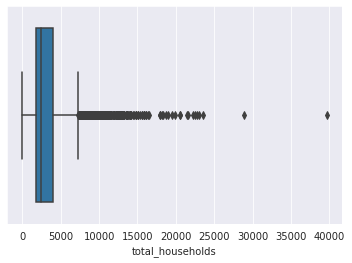

In [ ]:
sns.boxplot(x=data['total_households'])

In [ ]:
data['total_households'] = np.where(data['total_households']==1, data['total_households'].quantile(0.10),data['total_households'])

In [ ]:
data['total_households'].describe()

count     2822.000000
mean      3665.781247
std       3265.911353
min        178.000000
25%       1778.858235
50%       2398.249935
75%       3987.080563
max      39684.942130
Name: total_households, dtype: float64

In [ ]:
# vemos outliers para total_individuals
data['total_individuals'].describe()

count     2822.000000
mean     12869.130053
std       9696.690518
min        402.000000
25%       7071.205695
50%       9366.989680
75%      14241.233015
max      91716.746370
Name: total_individuals, dtype: float64

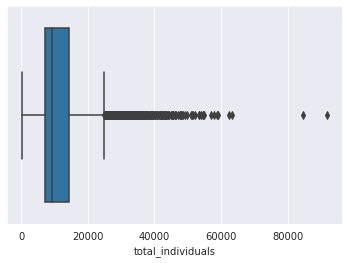

In [ ]:
sns.boxplot(x=data['total_individuals'])

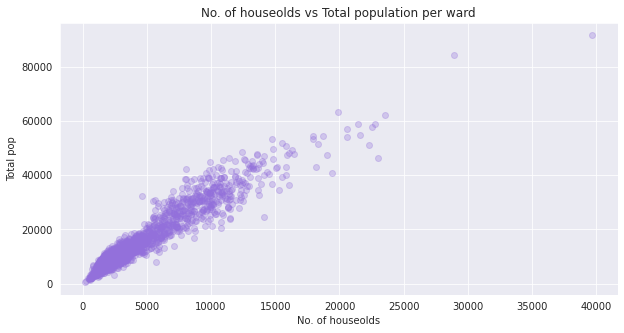

In [ ]:
# Total_hh vs Total_individuals
plt.figure(figsize=(10,5))
plt.plot(data['total_households'],data['total_individuals'],'o',color='mediumpurple',alpha=0.3)
# plt.axis([0.0,0.01,0,60])
plt.title('No. of houseolds vs Total population per ward')
plt.xlabel('No. of houseolds')
plt.ylabel('Total pop')
plt.show()

In [ ]:
# data['total_individuals'].nlargest(n=5)

In [ ]:
# Outliers etnia White
data['pg_03'].describe()

count    2822.000000
mean        0.074429
std         0.169270
min         0.000000
25%         0.000451
50%         0.001208
75%         0.041841
max         0.940563
Name: pg_03, dtype: float64

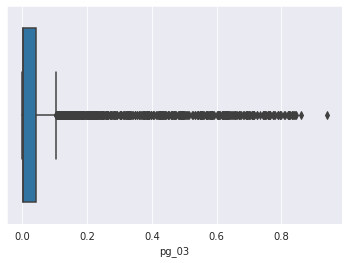

In [ ]:
# Outliers etnia White
sns.boxplot(x=data['pg_03'])

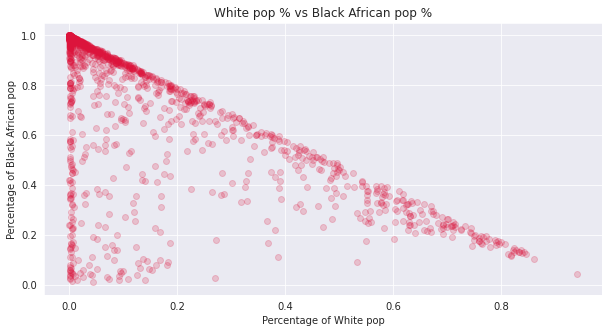

In [ ]:
# White pop % vs Black African pop %
plt.figure(figsize=(10,5))
plt.plot(white,black_african,'o',color='crimson',alpha=0.2)
# plt.axis([0.0,0.01,0,60])
plt.title('White pop % vs Black African pop %')
plt.xlabel('Percentage of White pop')
plt.ylabel('Percentage of Black African pop')
plt.show()

### Evaluación de correlación y multicolinealidad

In [ ]:
tgt_corr = data[['dw_00','dw_01','dw_08','psa_00','psa_01','lan_04','lan_03','lan_00','lan_01',
                'pg_00','pg_01','pg_02','pg_03','lgt_00','pw_00','pw_06','NL','target']]

Text(0.5, 1.0, 'Features correlating with target')

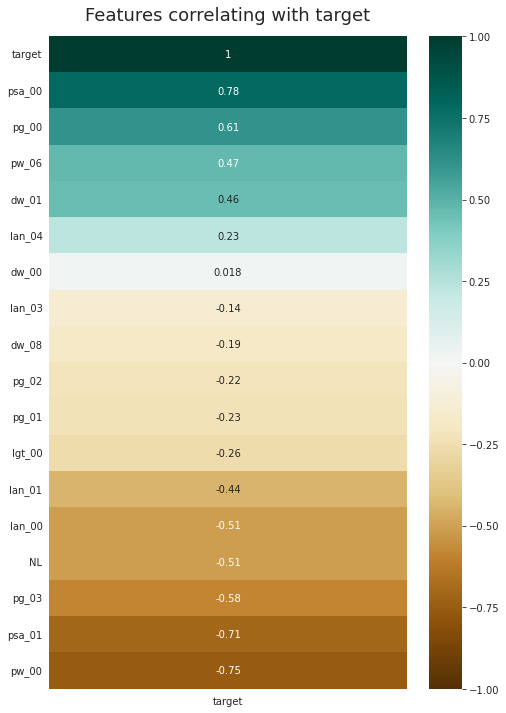

In [ ]:
# features correlating with target
plt.figure(figsize=(8,12))

heatmap = sns.heatmap(tgt_corr.corr()[['target']].sort_values(by='target',ascending=False),vmin=-1,
                                                             vmax=1, annot=True, cmap='BrBG')
plt.yticks(rotation=0)
heatmap.set_title('Features correlating with target', fontdict={'fontsize':18},pad=16)

Text(0.5, 1.0, 'Correlation Heatmap')

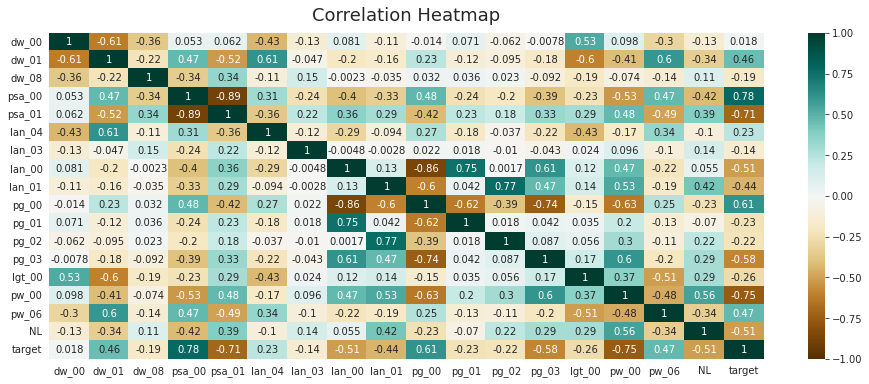

In [ ]:
# correlation heatmap
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(tgt_corr.corr(),vmin=-1,vmax=1,annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':18},pad=12)

In [ ]:
tgt_corr_2 = data[['total_households','total_individuals','stv_00','stv_01','car_00','car_01','lln_00','lln_01','pg_00',
                'pg_01','pg_03','lan_00','lan_04','dw_02','dw_09','pw_01','pw_05','target']]

Text(0.5, 1.0, 'Correlation Heatmap')

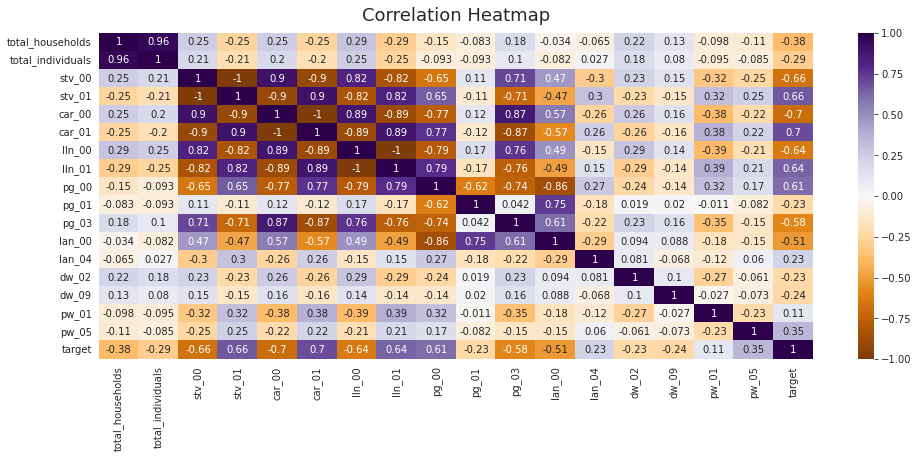

In [ ]:
# correlation heatmap set 2
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(tgt_corr_2.corr(),vmin=-1,vmax=1,annot=True,cmap='PuOr')
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':18},pad=12)

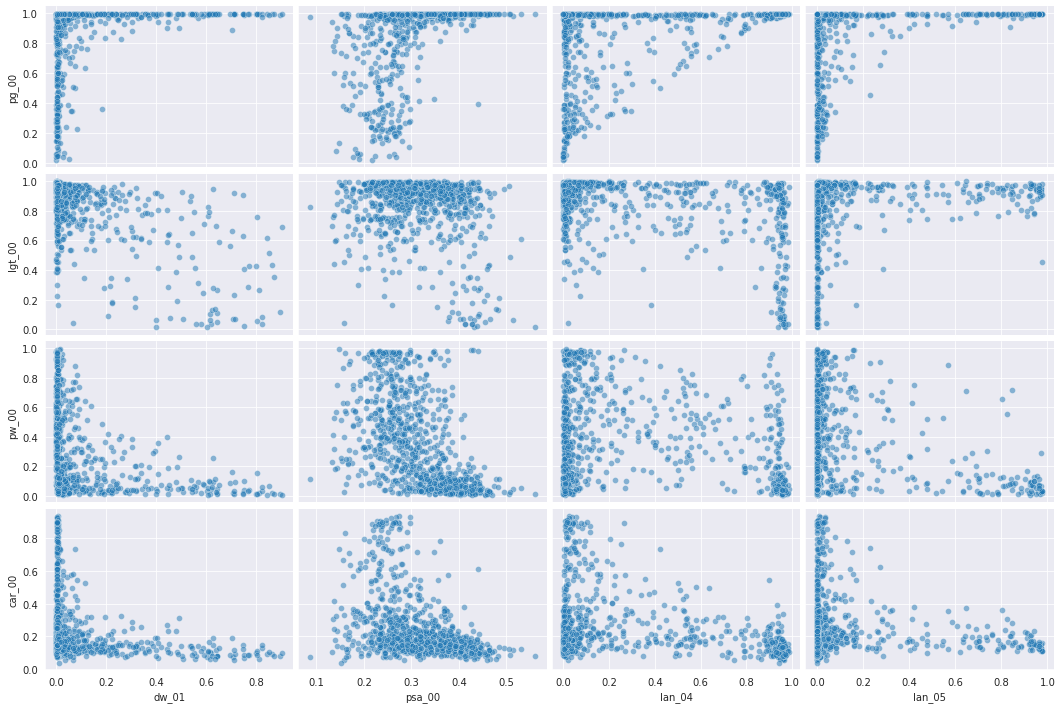

In [ ]:
# correlación entre variables explicativas
data_sample = data.sample(frac=0.3)
sns.pairplot(data_sample, x_vars=['dw_01','psa_00','lan_04','lan_05'],\
            y_vars=['pg_00','lgt_00','pw_00','car_00'],plot_kws={'alpha':0.5}, aspect=1.5,\
            diag_kind=None);

In [ ]:
# computamos VIF para cada variable independiente

vif_data = data[['total_individuals','total_households','dw_00','dw_01','dw_08','dw_09','psa_00',
               'stv_00','car_00','lln_00','lan_00','lan_01','lan_03','lan_04','lan_05','lan_06',
               'lan_07','pg_00','pg_01','pg_03','lgt_00','pw_00','pw_03','pw_05','pw_06']]

vif_data['hh_size'] = vif_data['total_households']/vif_data['total_individuals'] 
vif_data.drop(['total_individuals','total_households'],axis=1,inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
vif_3=pd.DataFrame()
vif_3["feature"]=vif_data.columns
vif_3['vif_factor']=[variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])]
vif_3.sort_values(by='vif_factor',ascending=False)

feature  vif_factor
15    pg_00  217.450281
23  hh_size   53.212677
4    psa_00   50.822146
0     dw_00   49.389330
6    car_00   48.640165
18   lgt_00   39.646615
8    lan_00   25.407815
5    stv_00   21.232396
17    pg_03   16.956499
7    lln_00   16.886913
19    pw_00   14.036578
16    pg_01   11.651445
9    lan_01    8.446795
1     dw_01    7.713973
11   lan_04    6.135401
2     dw_08    3.405458
22    pw_06    2.880094
20    pw_03    2.606725
12   lan_05    2.560816
14   lan_07    2.529165
13   lan_06    2.368132
21    pw_05    1.590928
10   lan_03    1.565524
3     dw_09    1.330920

### Feature Selection

Selección con Filter Methods

In [ ]:
data_num = data.drop(['ward','lon','lat','ADM4_PCODE','target'],axis=1)
target = data['target']

In [ ]:
# features con baja varianza
# calculamos var de cada feature para determinar el umbral que ussaremos
pd.options.display.float_format = '{:.6f}'.format
data_num.apply(np.var).sort_values(ascending=False)[:20]

total_individuals   93992488.149928
total_households    10662397.312979
NL                       359.301954
lan_04                     0.135056
pw_00                      0.092670
lan_07                     0.067898
lan_05                     0.065152
pg_00                      0.061181
pw_01                      0.055980
lan_06                     0.048452
dw_00                      0.045795
lan_00                     0.041600
lgt_00                     0.041252
car_01                     0.037500
car_00                     0.037500
pw_06                      0.034361
dw_01                      0.033423
stv_00                     0.030200
stv_01                     0.030200
pg_03                      0.028642
dtype: float64

In [ ]:
# umbral en 0.05
vt = VarianceThreshold(threshold=0.05) 
df_heart_vt = vt.fit_transform(data_num)
df_heart_vt[:2]

array([[1.67445058e+03, 5.88820750e+03, 0.00000000e+00, 5.63954300e-04,
        6.37102550e-03, 3.57455402e-01, 7.42692203e-01, 2.14027027e-01,
        2.92038526e-01],
       [1.73699230e+03, 6.73533812e+03, 8.41625200e-04, 1.75857100e-03,
        3.08441293e-02, 6.98427860e-01, 3.09293875e-01, 5.76844158e-01,
        3.20777547e+00]])

In [ ]:
data_num.columns[vt.get_support()]

Index(['total_households', 'total_individuals', 'lan_04', 'lan_05', 'lan_07',
       'pg_00', 'pw_00', 'pw_01', 'NL'],
      dtype='object')

In [ ]:
data_reduced_vt = pd.DataFrame(data_num,columns=data_num.columns[vt.get_support()])
data_reduced_vt.sample(3)

total_households  total_individuals   lan_04   lan_05   lan_07    pg_00  \
216         715.680750        2209.932570 0.029851 0.010079 0.013593 0.886767   
2154       2620.213680       10276.936380 0.114745 0.331324 0.033617 0.993582   
1209       1661.466340        7398.434610 0.952227 0.000169 0.004632 0.993652   

        pw_00    pw_01        NL  
216  0.367510 0.518917 11.085288  
2154 0.172296 0.762191  7.943597  
1209 0.841902 0.158098 32.860985

In [ ]:
# features univariados
best_k = SelectKBest(score_func=f_regression,k=15)
fit_k = best_k.fit_transform(data_num,target)

invalid value encountered in true_divide


In [ ]:
data_reduced_k = pd.DataFrame(fit_k,columns=data_num.columns[best_k.get_support()])
data_reduced_k.sample()

dw_01   psa_00   psa_01   stv_00   stv_01   car_00   car_01   lln_00  \
399 0.004269 0.203487 0.665046 0.431452 0.568548 0.558707 0.441293 0.205588   

      lln_01   lan_00    pg_00    pg_03    pw_00    pw_06        NL  
399 0.794412 0.491147 0.396795 0.567959 0.893281 0.004174 47.690805

In [ ]:
# imprimimos scores 
k_best_scores = pd.DataFrame(best_k.scores_)
dfcolumns = pd.DataFrame(data_num.columns)

scores = pd.concat([dfcolumns,k_best_scores],axis=1)
scores.columns=['Feature','Score']

print(scores.nlargest(10,'Score'))

   Feature       Score
16  psa_00 4452.966468
48   pw_00 3727.850583
17  psa_01 2826.381691
24  car_01 2752.811781
23  car_00 2752.811781
22  stv_01 2225.959645
21  stv_00 2225.959645
26  lln_01 1934.142702
25  lln_00 1934.142702
42   pg_00 1700.629485


In [ ]:
#Entrenamos un modelo forest regresor para ver la feature importance

features = data.drop('ADM4_PCODE', axis=1).columns[4:]

rf = RandomForestRegressor(n_estimators=100) # My go-to quick model for regression tasks.
rf.fit(data[features][:-1000], data['target'][:-1000])

importances = rf.feature_importances_
indices = np.argsort(importances)

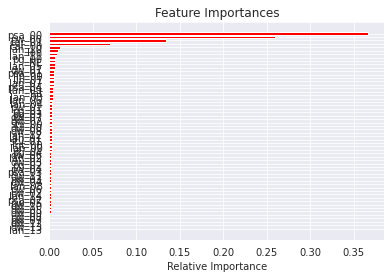

In [ ]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## **Feature Engineering**

### Feature Engineering: Distancia a la costa

In [10]:
geometria = gpd.points_from_xy(data.lon, data.lat)
geo_muni = gpd.GeoDataFrame(data ,geometry=geometria)

In [11]:
geometria_test = gpd.points_from_xy(data_test.lon, data_test.lat)
geo_muni_test = gpd.GeoDataFrame(data_test ,geometry=geometria_test)

In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.loc[world.name == 'South Africa']

pop_est continent          name iso_a3  gdp_md_est  \
25  54841552    Africa  South Africa    ZAF    739100.0   

                                             geometry  
25  POLYGON ((16.34498 -28.57671, 16.82402 -28.082...

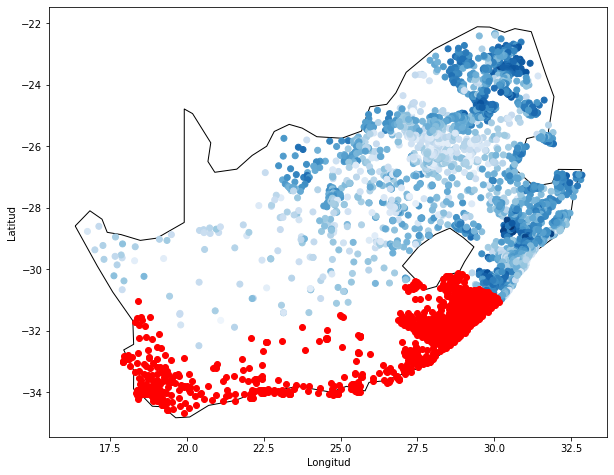

In [13]:
fig, ax = plt.subplots(figsize=(10,10))

world.loc[world.name == 'South Africa'].plot(ax=ax, color='white',edgecolor='black')

geo_muni.plot(ax=ax, column='target', cmap='Blues')#target

geo_muni_test.plot(ax=ax,color='red')

ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show();

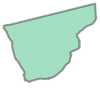

In [14]:
sa_perimeter = list(world.loc[world.name == 'South Africa'].loc[:,'geometry'].values[0].exterior.coords)
namibia_perimeter = list(world.loc[world.name == 'Namibia'].loc[:,'geometry'].values[0].exterior.coords)
mozambique_perimeter = list(world.loc[world.name == 'Mozambique'].loc[:,'geometry'].values[0].exterior.coords)

coast_perimeter = mozambique_perimeter[8:41]+sa_perimeter[45:82]+namibia_perimeter[8:25]

Polygon(coast_perimeter)

In [15]:
distance = geo_muni.geometry.apply(lambda x: Polygon(coast_perimeter).exterior.distance(x))
data['distance_to_coast'] = distance
distance_test = geo_muni_test.geometry.apply(lambda x: Polygon(coast_perimeter).exterior.distance(x))
data_test['distance_to_coast'] = distance_test

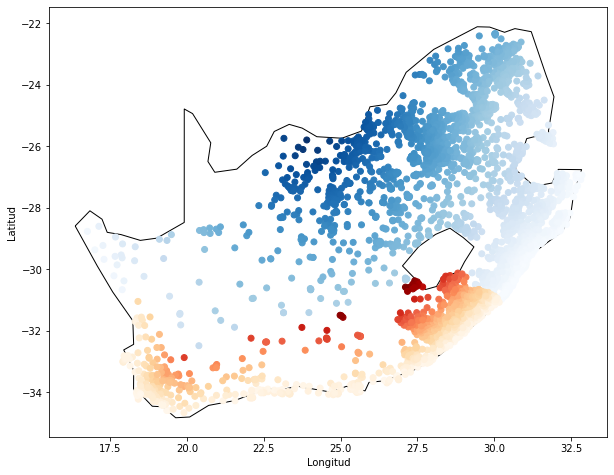

In [16]:
fig, ax = plt.subplots(figsize=(10,10))

world.loc[world.name == 'South Africa'].plot(ax=ax, color='white',edgecolor='black')

geo_muni.plot(ax=ax, column='distance_to_coast', cmap='Blues')#target

geo_muni_test.plot(ax=ax, column='distance_to_coast', cmap='OrRd')

ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show();

In [17]:
data.drop(columns=['geometry'],inplace=True)
data_test.drop(columns=['geometry'],inplace=True)

### Feature Engineering: densidad de población, área de ward y distancia a capital

In [18]:
geo_shp_prov = gpd.read_file('/content/drive/MyDrive/Digital House - Desafío 4 - Grupo 1/Mapas/SHP/zaf_adm_sadb_ocha_20201109_SHP/zaf_admbnda_adm1_sadb_ocha_20201109.shp')
geo_shp_ward = gpd.read_file('/content/drive/MyDrive/Digital House - Desafío 4 - Grupo 1/Mapas/SHP/zaf_adm_sadb_ocha_20201109_SHP/zaf_admbnda_adm4_sadb_ocha_20201109.shp')
df_cap_cities = pd.DataFrame({'City':['Bhisho','Bloemfontein','Johannesburg','Pietermaritzburg','Polokwane','Mbombela','Mahikeng','Kimberley','Cape Town'],
                             'ADM1_EN':['Eastern Cape','Free State','Gauteng','KwaZulu-Natal','Limpopo','Mpumalanga','North West','Northern Cape','Western Cape'],
                             'Latitude':[-32.84721,-29.12107,-26.20227,-29.61679,-23.90449,-25.47448,-25.86522,-28.73226,-33.92584],
                             'Longitude':[27.44218,26.214,28.04363,30.39278,29.46885,30.97033,25.64421,24.76232,18.42322]})

In [19]:
geo_shp_prov['ADM1_EN'] = geo_shp_prov['ADM1_EN'].replace({'Nothern Cape':'Northern Cape'})

In [20]:
# creamos los points para los wards
data['geometry'] = data.apply(lambda x: Point((x.lon, x.lat)),axis=1)

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.


In [21]:
wards_crs = {'init': 'epsg:4326'}
geo_wards = gpd.GeoDataFrame(data,crs = wards_crs, geometry=data.geometry)

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


In [22]:
# para mantener la geometría de los puntos centrales de wards
geo_wards['saved_geom'] = geo_wards['geometry'].to_crs(epsg = 3857)

Agregamos distancia de ward  a capital de su provincia

In [23]:
# sjoin entre provincias y wards
ward_within_prov = gpd.sjoin( geo_shp_prov,geo_wards,op = 'contains')

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs



In [24]:
# conservamos el indice de data en el df resultante del sjoin
ward_within_prov.set_index('index_right', inplace = True)

In [25]:
# agregamos geometry al df de capitales de provincias
geo_cap_cities = df_cap_cities

In [26]:
geo_cap_cities['geometry'] = geo_cap_cities.apply(lambda x: Point((x.Longitude, x.Latitude)),axis=1)

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.


In [27]:
geo_capital = gpd.GeoDataFrame(geo_cap_cities, geometry=geo_cap_cities.geometry,crs=4326)

In [28]:
# pasar de metros a kilometros
m_to_km = 10**3

In [29]:
# para calcular dist en metros
geo_capital.geometry = geo_capital.geometry.to_crs(epsg = 3857)

In [30]:
def dist_to_capital(ward_pt, province):
    capital_pt = geo_capital.loc[geo_capital['ADM1_EN']==province,'geometry'].item()
    dist = capital_pt.distance(other=ward_pt)
    return dist

In [31]:
# calcula la mínima distancia entre punto central de ward
# y la capital de su provincia
ward_within_prov['distance_capital'] = ward_within_prov.apply(lambda x:dist_to_capital(x.saved_geom,x.ADM1_EN)/m_to_km,axis=1)

In [32]:
df_distance = ward_within_prov[['ADM4_PCODE','distance_capital']]
df_distance.shape

(2822, 2)

In [33]:
# agregamos la columna de distancia al df original data
data = pd.merge(data,df_distance,on=['ADM4_PCODE'])

Agregamos area y densidad de población

In [34]:
# unimos data con geo_df de wards
# geo_merge = geo_shp_ward.merge(data, on='ADM4_PCODE')
poly_ward = gpd.sjoin(geo_shp_ward,geo_wards.to_crs(epsg=4326),op = 'contains')

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.


In [35]:
# columna de geometria de poligono en m2
poly_ward['m2_geom'] = poly_ward['geometry'].to_crs(epsg = 3857)

In [36]:
# establecer el index original de data para la unión resultante
# entre wards y sus geometrias
poly_ward.set_index('index_right', inplace = True)

In [37]:
# de m2 a km2
m2_to_km2 = 10**6

In [38]:
poly_ward['area_km2'] = poly_ward.m2_geom.area/m2_to_km2
poly_ward['pop_density'] = poly_ward['total_individuals']/poly_ward['area_km2']

In [39]:
df_area =poly_ward[['ADM4_PCODE_right','area_km2','pop_density']]
df_area.rename(columns={'ADM4_PCODE_right':'ADM4_PCODE'},inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [40]:
# agregamos las columnas de area y densidad de población al df original data
data = pd.merge(data,df_area,on=['ADM4_PCODE'])

In [41]:
data.drop(['geometry','saved_geom'],axis=1,inplace=True)

In [42]:
data.columns

Index(['ward', 'total_households', 'total_individuals', 'target', 'dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08',
       'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01',
       'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01',
       'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
       'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
       'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03',
       'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05',
       'pw_06', 'pw_07', 'pw_08', 'ADM4_PCODE', 'lat', 'lon', 'NL',
       'distance_to_coast', 'distance_capital', 'area_km2', 'pop_density'],
      dtype='object')

#### Transformadores

In [43]:
# clase para feature selection
class FeatureSelection(BaseEstimator, TransformerMixin):

    def __init__(self,selected_features):
        self.selected_features=selected_features
    
    def fit(self,X,y=None):
        return self

    def transform(self, X, y=None):
        return X[self.selected_features]

    def return_selectec_features_(self):
        return self.selected_features

In [44]:
# clase para obtener ratio entre 2 columnas
class FeatureDivision(BaseEstimator,TransformerMixin):
    
    def __init__(self,dividendo,divisor):
        self.dividendo = dividendo
        self.divisor = divisor
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return pd.DataFrame(X[self.dividendo]/X[self.divisor],
                           index = X.index.values,
                           columns = [self.dividendo+'_'+self.divisor]) 


## **Train Test split**

In [45]:
X = data.drop(["target",'ward','ADM4_PCODE'],axis=1)
y = data.target

X_train, X_test,y_train, y_test = train_test_split(X,y,shuffle=True, random_state = 666)

#### Pasos pipes y FeatureUnion

In [46]:
# listado de variables con todas las variables, salvo las de lat y lon
features_list_1 = X_train.drop(['lat', 'lon'],axis=1).columns.values

In [47]:
# listado sin las nuevas cols calculadas
features_list_2 = X_train.drop(['area_km2','pop_density','distance_capital'],axis=1).columns.values

In [48]:
union_1 = FeatureUnion([('select',FeatureSelection(selected_features=features_list_1)),
                        ('div',FeatureDivision(dividendo='total_individuals',divisor='total_households'))])

In [49]:
union_2 = FeatureUnion([('select',FeatureSelection(selected_features=features_list_2)),
                        ('div',FeatureDivision(dividendo='total_individuals',divisor='total_households'))])

## Modelos

### Regresion Lineal

Funciones para RL con Lasso

In [ ]:
# creación y fit de modelo LR con Lasso
def fit_lasso(X,y,cv):
    model_lasso_cv = linear_model.LassoCV(alphas=np.linspace(0.01,100,1000),cv=cv,normalize=False)
    model_lasso_cv.fit(X,y)
    return model_lasso_cv

In [ ]:
def regression_results(truths,preds):
    
    explained_variance = metrics.explained_variance_score(truths,preds)
    mean_absolute_error = metrics.mean_absolute_error(truths,preds)
    mse = metrics.mean_squared_error(truths,preds)
#     mean_squared_log_error = metrics.mean_squared_log_error(truths,preds)
#     median_absolute_error = metrics.median_absolute_error(truths,preds)
    r2 = metrics.r2_score(truths,preds)
    
    print('Explained variance: ',round(explained_variance,4))
#     print('Mean squared log error: ',round(mean_squared_log_error,4))
    print('R2: ',round(r2,4))
    print('MAE: ',round(mean_absolute_error,4))
    print('MSE: ',round(mse,4))
    print('RMSE: ',round(np.sqrt(mse),4))

In [ ]:
def get_lasso_coeff(model,X):
    coeff = pd.DataFrame(model.coef_,columns=['Betas'],index=X.columns)
    return coeff

In [ ]:
def plot_coeff(coefs,t):
    coefs.plot(kind='barh',figsize=(12,10))
    plt.title(t)
    plt.axvline(x=0,color='.5')
    plt.subplots_adjust(left=.3)

Datos que usaremos,normalización y esquema de validación

In [ ]:
# lista de pasos para pipeline
pasos_1 = [('feature_engineering',union_1),
          ('estandarizacion',StandardScaler()),
          ('regresor',linear_model.Lasso())]

In [ ]:
pipe_grid_1 = Pipeline(pasos_1)

param_grid_1 = [{'feature_engineering':[union_1,union_2,None],
                'regresor__alpha':[0.01,0.1,1,10]}]

In [ ]:
cv = KFold(5,shuffle=True)

In [ ]:
# X_train_rl

In [ ]:
X_train_rl = X_train.copy()
y_train_rl = y_train.copy()

# X_train_rl
# y_train_rl = np.sqrt(y_train_rl)

In [ ]:
grid_1 = GridSearchCV(pipe_grid_1,param_grid_1,cv=cv)
print(X_train_rl.shape)
grid_1.fit(X_train_rl,y_train_rl)

(2116, 64)


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.432e+01, tolerance: 1.737e+01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.020e+01, tolerance: 1.786e+01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.743e+01, tolerance: 1.739e+01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.400e+01, tolerance: 1.737e+01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.993e+01, tolerance: 1.786e+01
Objective did n

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('feature_engineering',
                                        FeatureUnion(transformer_list=[('select',
                                                                        FeatureSelection(selected_features=array(['total_households', 'total_individuals', 'dw_00', 'dw_01', 'dw_02',
       'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09',
       'dw_10', 'dw_11', 'dw_12', 'dw_13', 'p...
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09',
       'lan_10', 'lan_11', 'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01',
       'pg_02', 'pg_03', 'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02',
       'pw_03', 'pw_04', 'pw_05', 'pw_06', 'pw_07', 'pw_08', 'lat', 'lon',
       'NL', 'distance_to_coast'], dtype=object))),
                                                                                 ('div',
                                                         

In [ ]:
grid_1.best_estimator_[0].transformer_list[0][1].return_selectec_features_

<bound method FeatureSelection.return_selectec_features_ of FeatureSelection(selected_features=array(['total_households', 'total_individuals', 'dw_00', 'dw_01', 'dw_02',
       'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09',
       'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01', 'psa_02',
       'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01',
       'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09',
       'lan_10', 'lan_11', 'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01',
       'pg_02', 'pg_03', 'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02',
       'pw_03', 'pw_04', 'pw_05', 'pw_06', 'pw_07', 'pw_08', 'lat', 'lon',
       'NL', 'distance_to_coast'], dtype=object))>

Vemos que el mejor estimador elegido tras combinar pipelines y gridsearch es con un alpha=0.01 e incluyendo al modelo con las columnas existentes más las calculadas posteriormente

In [ ]:
grid_1.best_score_

0.8571403634087751

In [ ]:
# X_train_L = X_train.drop(['lat','lon'],axis=1)
# y_train_L = y_train
# X_test_L = X_test.drop(['lat','lon'],axis=1)
# y_test_L = y_test

In [ ]:
# scaler = StandardScaler()
# X_train_scl_L = scaler.fit_transform(X_train_L)
# X_test_scl_L = scaler.transform(X_test_L)

In [ ]:
# cv = KFold(5,shuffle=True)

In [ ]:
# model_lasso_cv = fit_lasso(X_train_scl_L,y_train_L,cv)

In [ ]:
# print('Mejor alpha: ',model_lasso_cv.alpha_)

Analizamos los resultados del modelo

In [ ]:
pred = grid_1.predict(X_test)
residual = y_test - pred

In [ ]:
# predicciones Lasso y métricas
regression_results(y_test,pred)

# score en train y test
print(f'Score de modelo de LR con Lasso en train:{grid_1.score(X_train,y_train)}')
print(f'Score de modelo de LR con Lasso en test:{grid_1.score(X_test,y_test)}')

Explained variance:  0.87
R2:  0.8699
MAE:  2.9206
MSE:  14.4989
RMSE:  3.8077
Score de modelo de LR con Lasso en train:0.8693152736319023
Score de modelo de LR con Lasso en test:0.8698842133487754


In [ ]:
len(X_train_rl.columns)

64

In [ ]:
l1 =grid_1.best_estimator_['regresor']

In [ ]:
l1.n_features_in_

62

In [ ]:
if(len(l1.coef_)==64):
  coef_lasso = pd.DataFrame(l1.coef_,columns=['Betas'],index=X_train.columns)
  coef_lasso.head()
elif(len(l1.coef_)==63):
  fl1 = np.append(features_list_1,"avg_household_size")
  coef_lasso = pd.DataFrame(l1.coef_,columns=['Betas'],index=fl1)
  coef_lasso.head()
elif(len(l1.coef_)==62):
  fl2 = np.append(features_list_2,"avg_household_size")
  coef_lasso = pd.DataFrame(l1.coef_,columns=['Betas'],index=fl2)
  coef_lasso.head()

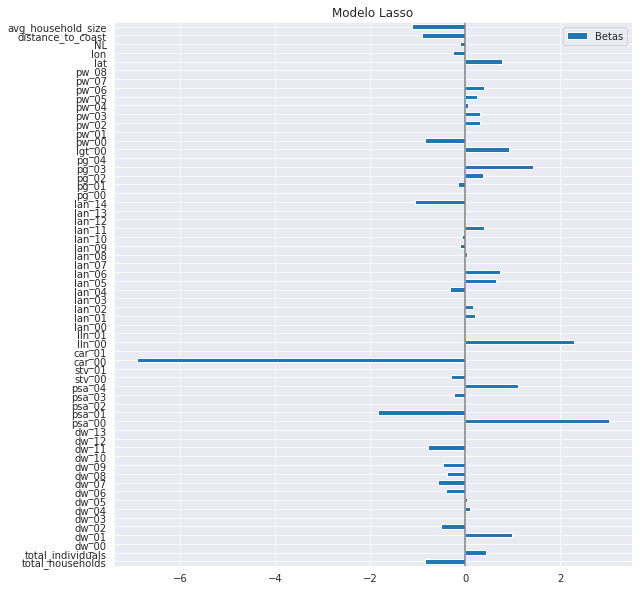

In [ ]:
plot_coeff(coef_lasso,'Modelo Lasso')

In [ ]:
eli5.show_weights(l1, top=-1, feature_names = coef_lasso.index.tolist())

Analizamos la regularización L1 con statsmodels

In [ ]:
# DataFrame con las features de train escaladas
# train_features_scaled=pd.DataFrame(X_train_scl_L, columns=X_train_L.columns)
# train_features_scaled.head(2)

In [ ]:
# X_sm = train_features_scaled
# y_sm = y_train_L.values.reshape(-1,1)
# X_sm = sm.add_constant(X_sm)
    
# model = sm.OLS(y_sm,X_sm)
# results = model.fit()

In [ ]:
# # alpha es la penalización, L1_wt=1 indica lasso fit
# # usamos el alpha=0.01 obtenido con cv en sklearn
# results_fr = model.fit_regularized(L1_wt=1, alpha=0.01, start_params=results.params)
# final = sm.regression.linear_model.OLSResults(model,
#                                              results_fr.params,
#                                              model.normalized_cov_params)
# print (final.summary())

Validación supuestos del modelo

#### No multicolinealidad

In [ ]:
vif_train_data = X_train

In [ ]:
def get_vif(df):
  vif_1 = pd.DataFrame()
  vif_1['feature'] = df.columns
  vif_1['vif_factor'] = [variance_inflation_factor(df.values,i) for i in range (df.shape[1])] 
  return vif_1

In [ ]:
vif_1 = get_vif(vif_train_data)

invalid value encountered in double_scalars


In [ ]:
vif_1.sort_values(by='vif_factor',ascending=False).head(5)

feature              vif_factor
23  car_00 9007199254740992.000000
3    dw_01 9007199254740992.000000
48   pw_00 9007199254740992.000000
25  lln_00 9007199254740992.000000
21  stv_00 4503599627370496.000000

In [ ]:
vif_1.sort_values(by='vif_factor',ascending=False).tail(5)

feature  vif_factor
14   dw_12         NaN
15   dw_13         NaN
40  lan_13         NaN
55   pw_07         NaN
56   pw_08         NaN

In [ ]:
nan_vif_features = vif_1.loc[vif_1['vif_factor'].isnull(),'feature'].values

In [ ]:
vif_train_data = vif_train_data.drop(nan_vif_features,axis=1) 

In [ ]:
vif_train_data = vif_train_data[['total_individuals','total_households','dw_00','dw_01','dw_08','dw_02','psa_00',
               'stv_00','car_00','lln_00','lan_00','lan_01','lan_03','lan_04','lan_05','lan_06',
               'lan_07','pg_00','pg_03','lgt_00','pw_00','pw_03','pw_05','pw_06','distance_capital','pop_density','area_km2','NL']]

In [ ]:
vif_1 = get_vif(vif_train_data)

In [ ]:
vif_1.sort_values(by='vif_factor',ascending=False)

feature  vif_factor
17              pg_00  169.046495
2               dw_00   96.268501
0   total_individuals   55.098611
1    total_households   50.262891
8              car_00   49.466458
6              psa_00   47.973924
19             lgt_00   40.570623
7              stv_00   22.111499
9              lln_00   19.049144
20              pw_00   14.800506
3               dw_01   10.780160
10             lan_00   10.423152
11             lan_01    7.857076
18              pg_03    7.827285
27                 NL    7.499740
13             lan_04    6.417440
24   distance_capital    4.685609
4               dw_08    4.683801
23              pw_06    2.935075
14             lan_05    2.725894
16             lan_07    2.668752
5               dw_02    2.589757
21              pw_03    2.587778
15             lan_06    2.491135
25        pop_density    2.004942
22              pw_05    1.605901
12             lan_03    1.574645
26           area_km2    1.438609

In [ ]:
vif_train_data_2 = X_train[['total_households','dw_03','dw_01','dw_08','dw_02','dw_04','dw_05','dw_06','dw_07','psa_00',
               'stv_00','car_00','lln_00','lan_00','lan_01','lan_03','lan_04','lan_05','lan_06',
               'lan_07','pg_02','pg_03','pg_04','lgt_00','pw_00','pw_03','pw_05','pw_06','distance_capital','pop_density','area_km2','NL']]

In [ ]:
vif_2 = get_vif(vif_train_data_2)
vif_2.sort_values(by='vif_factor',ascending=False)

feature  vif_factor
11            car_00   51.081211
9             psa_00   31.060367
23            lgt_00   25.321963
10            stv_00   22.588149
12            lln_00   18.678418
24             pw_00   14.573191
14            lan_01   11.195145
21             pg_03    9.618580
31                NL    7.662868
0   total_households    5.783923
16            lan_04    5.659697
28  distance_capital    4.542060
20             pg_02    4.521957
13            lan_00    4.171999
2              dw_01    3.881428
1              dw_03    3.122944
5              dw_04    2.948875
27             pw_06    2.839773
17            lan_05    2.597422
25             pw_03    2.540445
19            lan_07    2.376834
18            lan_06    2.369754
8              dw_07    2.354660
3              dw_08    2.050873
29       pop_density    2.005702
7              dw_06    1.786719
4              dw_02    1.699951
26             pw_05    1.588159
15            lan_03    1.509863
30          area_km2    1.391984
6              dw_05    1.234631
22             pg_04    1.208195

Text(0.5, 1.0, 'Correlation Heatmap')

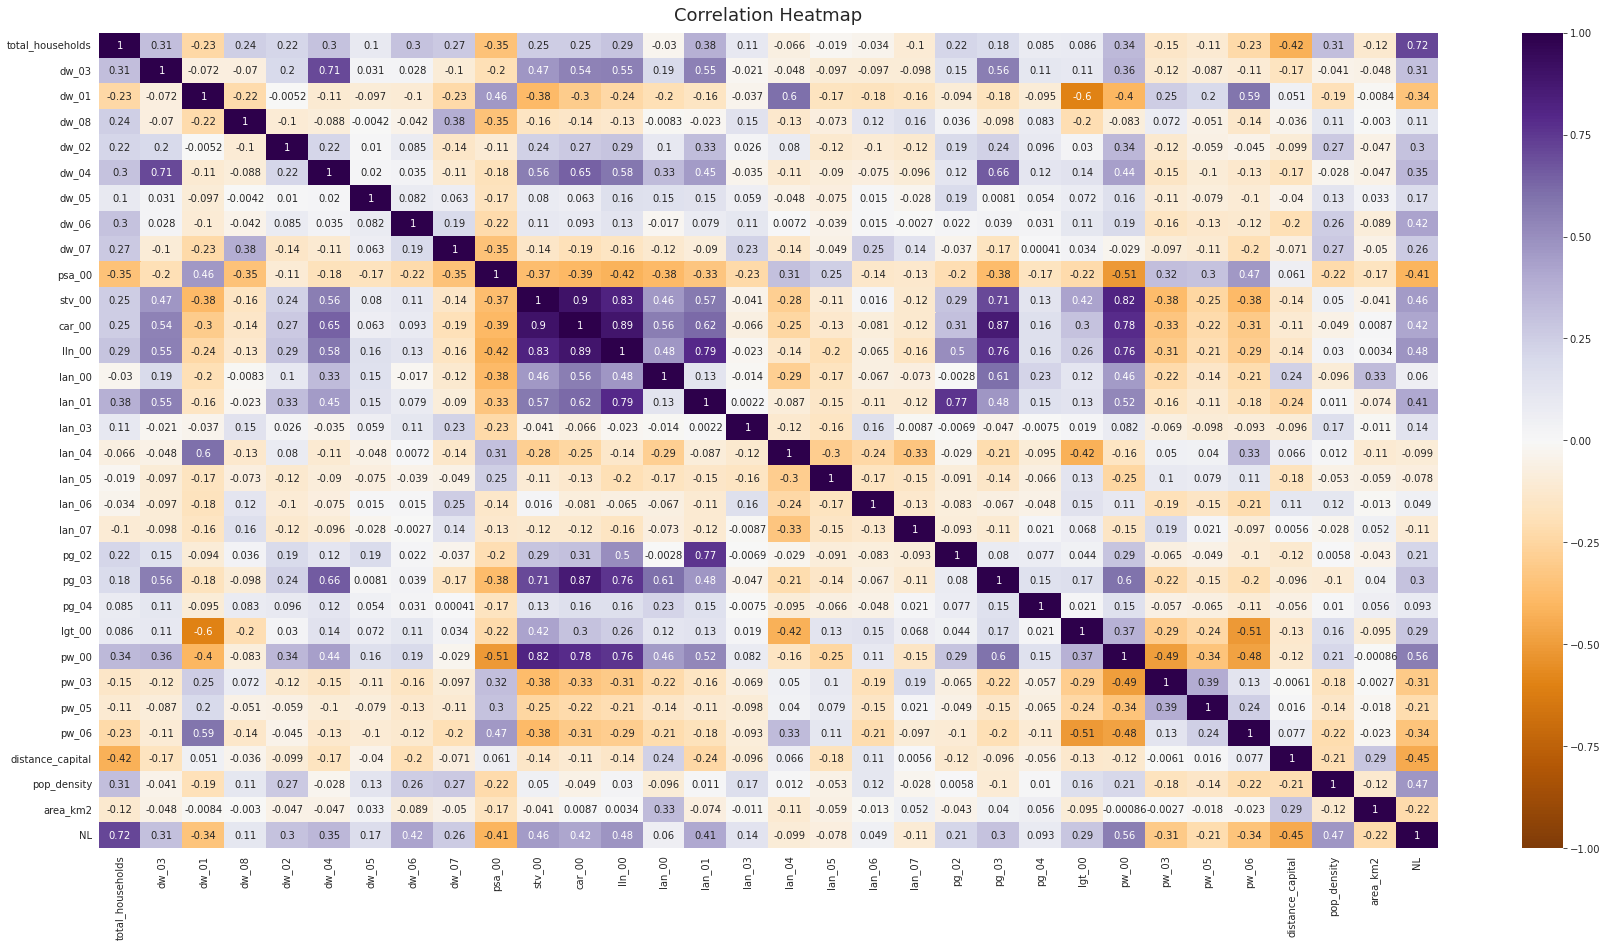

In [ ]:
plt.figure(figsize=(30,15))
heatmap = sns.heatmap(vif_train_data_2.corr(),vmin=-1,vmax=1,annot=True,cmap='PuOr')
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':18},pad=12)

Normalidad de los residuales

In [ ]:
pred = grid_1.predict(X_test)
residual = y_test - pred

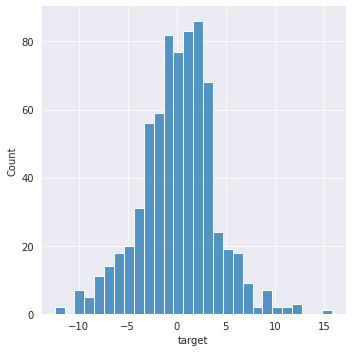

In [ ]:
sns.displot(residual)

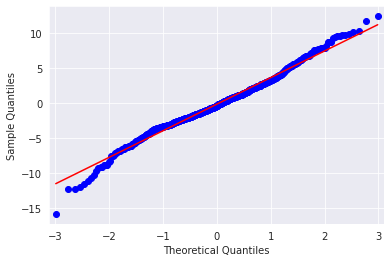

In [ ]:
sm.ProbPlot(pred-y_test).qqplot(line='s')
plt.show()

In [ ]:
np.mean(residual)

0.12124744983378424

In [ ]:
# modelo = model.fit()
# prediccion_train = modelo.predict(exog = X_sm)
# residuos_train = prediccion_train - y_sm[1]

In [ ]:
# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

# axes[0, 0].scatter(y_sm, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
# axes[0, 0].plot([y_sm.min(), y_sm.max()], [y_sm.min(), y_sm.max()],
#                 'k--', color = 'black', lw=2)
# axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
# axes[0, 0].set_xlabel('Real')
# axes[0, 0].set_ylabel('Predicción')
# axes[0, 0].tick_params(labelsize = 7)

# axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
#                    edgecolors=(0, 0, 0), alpha = 0.4)
# axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
# axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
# axes[0, 1].set_xlabel('id')
# axes[0, 1].set_ylabel('Residuo')
# axes[0, 1].tick_params(labelsize = 7)

# sns.histplot(
#     data    = residuos_train,
#     stat    = "density",
#     kde     = True,
#     line_kws= {'linewidth': 1},
#     color   = "firebrick",
#     alpha   = 0.3,
#     ax      = axes[1, 0]
# )

# axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
#                      fontweight = "bold")
# axes[1, 0].set_xlabel("Residuo")
# axes[1, 0].tick_params(labelsize = 7)


# sm.qqplot(
#     residuos_train,
#     fit   = True,
#     line  = 'q',
#     ax    = axes[1, 1], 
#     color = 'firebrick',
#     alpha = 0.4,
#     lw    = 2
# )
# axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
# axes[1, 1].tick_params(labelsize = 7)

# axes[2, 0].scatter(prediccion_train, residuos_train,
#                    edgecolors=(0, 0, 0), alpha = 0.4)
# axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
# axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
# axes[2, 0].set_xlabel('Predicción')
# axes[2, 0].set_ylabel('Residuo')
# axes[2, 0].tick_params(labelsize = 7)

# # Se eliminan los axes vacíos
# fig.delaxes(axes[2,1])

# fig.tight_layout()
# plt.subplots_adjust(top=0.9)
# fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
from scipy import stats
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residual)
shapiro_test

(0.9879117608070374, 1.4260044736147393e-05)

In [ ]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
# k2, p_value = stats.normaltest(residuos_train)
# print(f"Estadítico= {k2}, p-value = {p_value}")

Correcta especificación del modelo

#### Homocedasticidad 

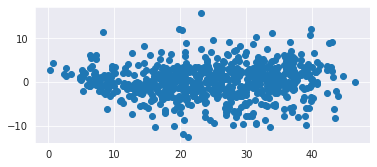

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(pred,residual)

In [ ]:
# model.df_resid

#### No autocorrelación de residuos

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


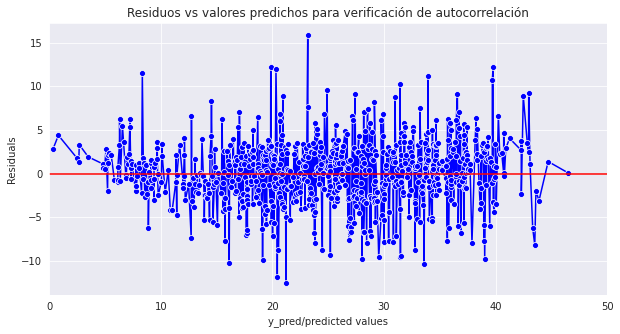

In [ ]:
plt.figure(figsize=(10,5))
p = sns.lineplot(pred, residual, marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim=(-10,10)
plt.xlim(0,50)
p = sns.lineplot([0,50],[0,0],color='red')
p = plt.title('Residuos vs valores predichos para verificación de autocorrelación')

### KNN

Tomas

In [ ]:
def prediction_results(y,predictions,X):
  print('R2 score: ', r2_score(y,predictions),
        '\nMAE score: ', mean_absolute_error(y,predictions),
        '\nRMSE score: ', mean_squared_error(y,predictions,squared=False),
        '\nAIC score: ', len(predictions) * np.log(mean_squared_error(y,predictions)) + 2 * X.shape[1])

In [ ]:
cv = KFold(5,shuffle=True)

In [ ]:
param_grid_knn = {'n_neighbors':range(3,25,2),'weights':['uniform','distance'],'metric':['minkowski'],'p':[1,2,3]}

In [ ]:
knn_grid = GridSearchCV(estimator=KNeighborsRegressor(n_jobs=-1),scoring='r2',cv=cv,param_grid=param_grid_knn)

In [ ]:
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsRegressor(n_jobs=-1),
             param_grid={'metric': ['minkowski'],
                         'n_neighbors': range(3, 25, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [ ]:
knn_grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

In [ ]:
knn_predictions_train = knn_grid.predict(X_train)

In [ ]:
knn_predictions_test = knn_grid.predict(X_test)

In [ ]:
prediction_results(y_train,knn_predictions_train,X_train)

R2 score:  1.0 
MAE score:  0.0 
RMSE score:  0.0 
AIC score:  -inf


divide by zero encountered in log


In [ ]:
prediction_results(y_test,knn_predictions_test,X_test)

R2 score:  0.462603230701903 
MAE score:  6.0446004977413015 
RMSE score:  7.7383785469928865 
AIC score:  3017.2233519513384


KNN con solo algunas columnas

In [ ]:
columns_knn_2 = ['psa_00','stv_00','lln_00','pg_03','pw_00']

In [ ]:
knn_grid.fit(X_train[columns_knn_2],y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsRegressor(n_jobs=-1),
             param_grid={'metric': ['minkowski'],
                         'n_neighbors': range(3, 25, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [ ]:
knn_grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 19, 'p': 2, 'weights': 'distance'}

In [ ]:
knn_predictions_train = knn_grid.predict(X_train[columns_knn_2])

In [ ]:
knn_predictions_test = knn_grid.predict(X_test[columns_knn_2])

In [ ]:
prediction_results(y_train,knn_predictions_train,X_train[columns_knn_2])

R2 score:  1.0 
MAE score:  0.0 
RMSE score:  0.0 
AIC score:  -inf


divide by zero encountered in log


In [ ]:
prediction_results(y_test,knn_predictions_test,X_test[columns_knn_2])

R2 score:  0.8213055490149557 
MAE score:  3.446892077349988 
RMSE score:  4.462291923194693 
AIC score:  2121.8754756463168


### Arbol de Regresion

Tomas

In [ ]:
# sns.set_context('poster')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
param_grid_tree = {'max_depth':range(6,12,1),'min_samples_split':range(50,150,50),'min_samples_leaf':range(20,50,5)}
#max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0

In [ ]:
tree_grid = GridSearchCV(estimator=DecisionTreeRegressor(),scoring='r2',cv=cv,param_grid=param_grid_tree,n_jobs=-1)

In [ ]:
tree_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(6, 12),
                         'min_samples_leaf': range(20, 50, 5),
                         'min_samples_split': range(50, 150, 50)},
             scoring='r2')

In [ ]:
tree_grid.best_params_

{'max_depth': 8, 'min_samples_leaf': 25, 'min_samples_split': 50}

In [ ]:
tree_predictions_train = tree_grid.predict(X_train)
prediction_results(y_train,tree_predictions_train,X_train)

R2 score:  0.88045578805636 
MAE score:  2.664868306371558 
RMSE score:  3.525089686193219 
AIC score:  5459.921679218126


In [ ]:
tree_predictions_test = tree_grid.predict(X_test)
prediction_results(y_test,tree_predictions_test,X_test)

R2 score:  0.8270307612417362 
MAE score:  3.354224006013486 
RMSE score:  4.39022604831727 
AIC score:  2216.885572976504


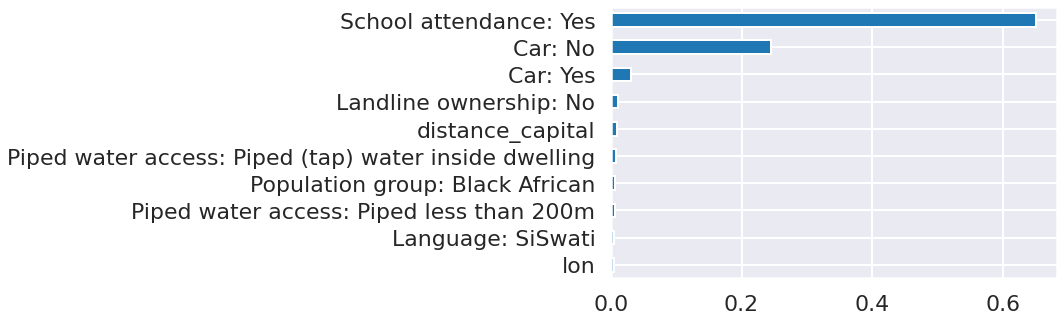

In [ ]:
plt.figure(figsize=(8,5))
pd.Series(data=tree_grid.best_estimator_.feature_importances_,
          index=pd.Series(X_train.columns).replace(columns_translate_dictionary)).sort_values(ascending=True).tail(10).plot(kind="barh")

In [ ]:
score = tree_grid.score(X_test, y_test)
result = tree_grid.predict(X_test)
ResidualSquare = (result - y_test)**2     #Calcular el cuadrado residual
RSS = sum(ResidualSquare)   #Calcular la suma de cuadrados residual
MSE = np.mean(ResidualSquare)       #Calcular el error cuadrático medio
num_regress = len(result)   # Número de muestras de regresión
p = X_test.shape[1]
AIC = num_regress * np.log(MSE) + 2 * p # num_regress is the number of training samples and p is the number of model parameters.

print(f'R^2={score}')
print(f'MSE={MSE}')
print(f'RSS={RSS}')
print(f'AIC: {AIC}')

R^2=0.8270307612417362
MSE=19.274084755323493
RSS=13607.503837258386
AIC: 2216.885572976504


Text(0.5, 1.0, 'Distribucion de los Residos')

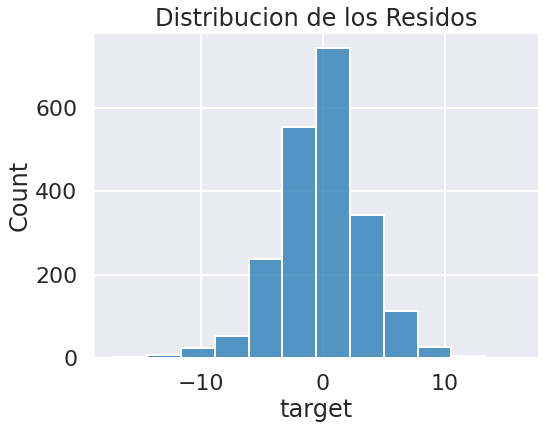

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=tree_predictions_train-y_train,bins=12)
plt.title('Distribucion de los Residos')

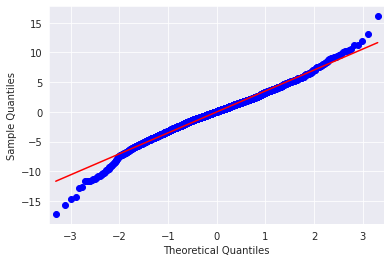

In [ ]:
sm.ProbPlot(tree_predictions_train-y_train).qqplot(line='s')
plt.show()

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.base import clone

In [ ]:
estimator = clone(tree_grid.best_estimator_)
min_features_to_select=2
selector = RFECV(estimator, step = 1, min_features_to_select=min_features_to_select, cv=cv, scoring = 'r2')#, verbose=2)
selector.fit(X_train, y_train)

RFECV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
      estimator=DecisionTreeRegressor(max_depth=8, min_samples_leaf=25,
                                      min_samples_split=50),
      min_features_to_select=2, scoring='r2')

In [ ]:
X_train.columns[selector.support_]

Index(['psa_00', 'car_00', 'car_01', 'lln_01', 'lan_10', 'pg_00', 'pw_00',
       'distance_capital'],
      dtype='object')

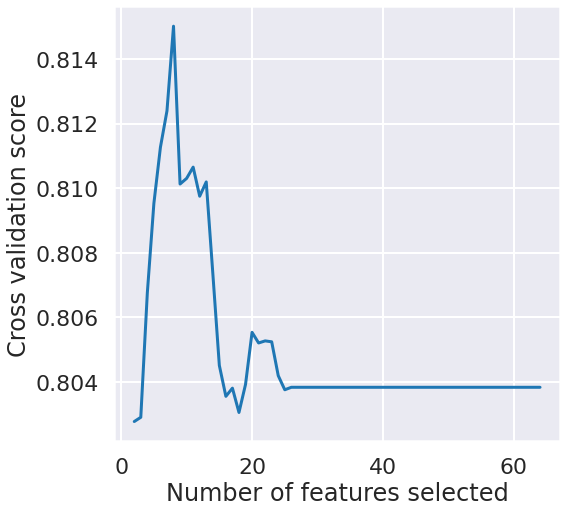

In [ ]:
plt.figure(figsize=(8,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(
    range(min_features_to_select, pd.DataFrame(selector.cv_results_).shape[0] + min_features_to_select),
    pd.DataFrame(selector.cv_results_).iloc[:,0],
)
plt.show()

R2 score:  0.871990523250728 
MAE score:  2.7252737367087843 
RMSE score:  3.6477658682058194 
AIC score:  5492.694211465852


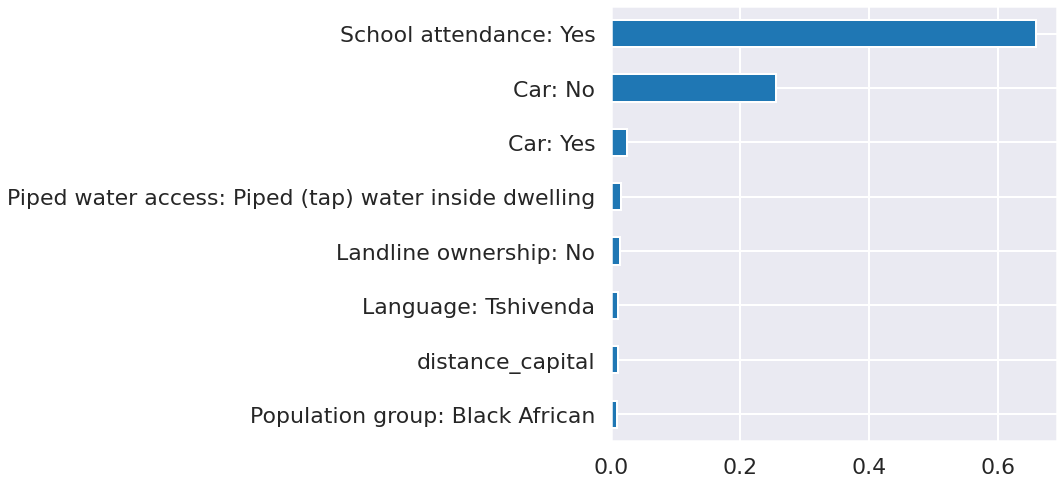

In [ ]:
estimator.fit(X_train.loc[:,selector.support_],y_train)

prediction = estimator.predict(X_train.loc[:,selector.support_])
prediction_results(y_train,prediction,X_train.loc[:,selector.support_])

plt.figure(figsize=(8,8))
pd.Series(data=estimator.feature_importances_,index=pd.Series(X_train.columns[selector.support_]).replace(columns_translate_dictionary)).sort_values(ascending=True).plot(kind="barh")#.replace(columns_translate_dictionary)

### Random Forest

Primero se determina el max_features y n_estimators óptimo para el ajuste de random forest.

Usando OOB score. Se evaluara como max_features los valores de 0.2, 0.4, 0.6, 0.8 y los n_estimator 100,200,400,600,800,1000

https://harvard-iacs.github.io/2017-CS109A/labs/lab9/notebook/

In [50]:
from itertools import product
from collections import OrderedDict
param_dict = OrderedDict(
    n_estimators = [100,200,400,600,800,1000],
    max_features = [0.2, 0.4, 0.6, 0.8]
)
#
param_dict.values()

odict_values([[100, 200, 400, 600, 800, 1000], [0.2, 0.4, 0.6, 0.8]])

In [51]:
results = {}
estimators= {}
for n, f in product(*param_dict.values()):
    params = (n, f)

    est = RandomForestRegressor(oob_score=True, 
                                n_estimators=n, max_features=f, n_jobs=-1,random_state=123456)
    est.fit(X_train, y_train)
    results[params] = est.oob_score_
    estimators[params] = est
outparams = max(results, key = results.get)
outparams

(1000, 0.8)

In [52]:
rf1 = estimators[outparams]
rf1

RandomForestRegressor(max_features=0.8, n_estimators=1000, n_jobs=-1,
                      oob_score=True, random_state=123456)

In [58]:
from sklearn.metrics import mean_absolute_error
# Parámetros de desempeño con X_train
score_RF_train = rf1.score(X_train, y_train)
result_train = rf1.predict(X_train)
ResidualSquare_train = (result_train - y_train)**2     #Calcular el cuadrado residual
RSS_RF_train = sum(ResidualSquare_train)   #Calcular la suma de cuadrados residual
MSE_RF_train = np.mean(ResidualSquare_train)       #Calcular el error cuadrático medio
num_regress_train = len(result_train)   # Número de muestras de regresión
MAE_RF_train = mean_absolute_error(y_train, rf1.predict(X_train))
p_train = X_train.shape[1]
AIC_RF_train = num_regress_train * np.log(MSE_RF_train) + 2 * p_train # num_regress is the number of training samples and p is the number of model parameters.



In [59]:
print(f'R^2={score_RF_train}')
print(f'MSE={MSE_RF_train}')
print(f'MAE={MAE_RF_train}')
print(f'RSS={RSS_RF_train}')
print(f'Out-of-bag score estimate: {rf1.oob_score_:.3}')
print(f'AIC: {AIC_RF_train}')

R^2=0.9840739407166685
MSE=1.6554654311046233
MAE=0.9669917666185411
RSS=3502.964852217383
Out-of-bag score estimate: 0.883
AIC: 1194.6379278904967


In [60]:
# Parámetros de desempeño con X_test
score_RF = rf1.score(X_test, y_test)
result = rf1.predict(X_test)
ResidualSquare = (result - y_test)**2     #Calcular el cuadrado residual
RSS_RF = sum(ResidualSquare)   #Calcular la suma de cuadrados residual
MSE_RF = np.mean(ResidualSquare)       #Calcular el error cuadrático medio
MAE_RF = mean_absolute_error(y_test, rf1.predict(X_test))
num_regress = len(result)   # Número de muestras de regresión
p = X_test.shape[1]
AIC_RF = num_regress * np.log(MSE_RF) + 2 * p # num_regress is the number of training samples and p is the number of model parameters.



In [61]:
print(f'R^2={score_RF}')
print(f'MSE={MSE_RF}')
print(f'MAE={MAE_RF}')
print(f'RSS={RSS_RF}')
print(f'Out-of-bag score estimate: {rf1.oob_score_:.3}')
print(f'AIC: {AIC_RF}')


R^2=0.8916153117858576
MSE=12.077382555508791
MAE=2.622628646997929
RSS=8526.632084189207
Out-of-bag score estimate: 0.883
AIC: 1886.8821521713724


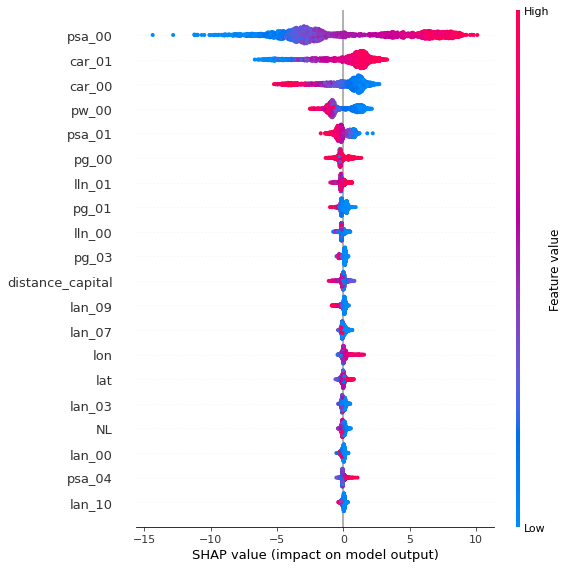

In [65]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf1)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_train)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X_train)

In [ ]:
explainer.supports_model_with_masker

In [67]:
fi = ['psa_00','car_01','car_00','pw_00','psa_01','pg_00','lln_01',
            'pg_01','lln_00','pg_03','distance_capital','lan_09','lan_07','lon','lat','lan_03',
            'NL','lan_00','psa_04','lan_10']
X2 = X_train[fi]
X_test2=X_test[fi]

In [68]:
results = {}
estimators= {}
for n, f in product(*param_dict.values()):
    params = (n, f)

    est = RandomForestRegressor(oob_score=True, 
                                n_estimators=n, max_features=f, n_jobs=-1,random_state=123456)
    est.fit(X2, y_train)
    results[params] = est.oob_score_
    estimators[params] = est
outparams = max(results, key = results.get)
outparams

(1000, 0.8)

In [69]:
rf2 = estimators[outparams]
rf2

RandomForestRegressor(max_features=0.8, n_estimators=1000, n_jobs=-1,
                      oob_score=True, random_state=123456)

In [70]:
# Desempeño de modelo en train
score_RF2_train2 = rf2.score(X2, y_train)
result_train2 = rf2.predict(X2)
ResidualSquare_train2 = (result_train2 - y_train)**2     #Calcular el cuadrado residual
RSS_RF2_train2 = sum(ResidualSquare_train2)   #Calcular la suma de cuadrados residual
MAE_RF_train2 = mean_absolute_error(y_train, rf2.predict(X2))
MSE_RF2_train2 = np.mean(ResidualSquare_train2)       #Calcular el error cuadrático medio
num_regress_train2 = len(result_train2)   # Número de muestras de regresión
p_train2 = X2.shape[1]
AIC_RF2_train2 = num_regress_train2 * np.log(MSE_RF2_train2) + 2 * p_train2 # num_regress is the number of training samples and p is the number of model parameters.


In [72]:
print(f'R^2={score_RF2_train2}')
print(f'MSE={MSE_RF2_train2}')
print(f'MAE={MAE_RF_train2}')
print(f'RSS={RSS_RF2_train2}')
print(f'Out-of-bag score estimate: {rf2.oob_score_:.3}')
print(f'AIC: {AIC_RF2_train2}')

R^2=0.9841285195914561
MSE=1.6497921230456842
MAE=0.9597904705472506
RSS=3490.960132364668
Out-of-bag score estimate: 0.883
AIC: 1099.3739059826762


In [ ]:
# Desempeño de modelo en test
score_RF2 = rf2.score(X_test2, y_test)
result = rf2.predict(X_test2)
ResidualSquare = (result - y_test)**2     #Calcular el cuadrado residual
RSS_RF2 = sum(ResidualSquare)   #Calcular la suma de cuadrados residual
MSE_RF2 = np.mean(ResidualSquare)       #Calcular el error cuadrático medio
num_regress = len(result)   # Número de muestras de regresión
p = X_test.shape[1]
AIC_RF2 = num_regress * np.log(MSE_RF2) + 2 * p # num_regress is the number of training samples and p is the number of model parameters.


In [ ]:
print(f'R^2={score_RF2}')
print(f'MSE={MSE_RF2}')
print(f'RSS={RSS_RF2}')
print(f'Out-of-bag score estimate: {rf2.oob_score_:.3}')
print(f'AIC: {AIC_RF2}')

In [ ]:

feats = param_dict['max_features']
# 
error_rate = OrderedDict((label, []) for label in feats)

# Range of `n_estimators` values to explore.
min_estimators = 200
step_estimators = 200
num_steps = 4
max_estimators = min_estimators + step_estimators*num_steps
for label in feats:
    for i in range(min_estimators, max_estimators+1, step_estimators):
        clf = RandomForestRegressor(oob_score=True, max_features=label,random_state=123456)
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

In [ ]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right",title = "Max_features")
plt.show()

### **Boosting**

Con <b>Bagging</b> y <b>Random Forests</b> entrenamos modelos en subsets separados y luego combinamos su predicción. Estamos paralelizando el entrenamiento y luego combinando los resultados.
<b>Boosting</b> es otra técnica de ensamble en la que el entrenamiento es secuencial. Boosting</b> es un procedimiento iterativo que va construyendo un modelo final en pasos.
</li>

#### ***Adaboost***

La primera iteración utiliza <b>pesos uniformes</b> para todos los registros. En las iteraciones posteriores, los pesos se ajustan para <b>enfatizar los errores</b> en la iteración anterior.
La predicción final se construye mediante un <b>voto ponderado</b> de los distintos modelos base. Donde los pesos para cada modelo base dependen de su error de entrenamiento.
Adaboost toma un <b>modelo base débil</b> e intenta hacerlo fuerte al reentrenarlo en las muestras mal clasificadas.

En este caso como modelo base debil tomaremos una regresion lineal

In [ ]:
base_regressor = LinearRegression()

In [ ]:
bost_linreg = AdaBoostRegressor(base_estimator = base_regressor, 
                            n_estimators = 200,
                            learning_rate = 0.8,           
                            loss = 'linear',
                            random_state = 666)

In [ ]:
bost_linreg.fit(X_train, y_train)

In [ ]:
y_pred_LinReg_boosting = bost_linreg.predict(X_train)
pred_LinReg_boosting = prediction_results(y_train,y_pred_LinReg_boosting, X_train)

In [ ]:
ResidualSquare = (y_pred_LinReg_boosting - y_train)**2     #Calcular el cuadrado residual
RSS = sum(ResidualSquare)   #Calcular la suma de cuadrados residual
MSE = np.mean(ResidualSquare)       #Calcular el error cuadrático medio

num_regress = len(y_pred_LinReg_boosting)   # Número de muestras de regresión
p = X_train.shape[1]
AIC = num_regress * np.log(MSE) + 2 * p # num_regress is the number of training samples and p is the number of model parameters.
AIC

In [ ]:
prediction = bost_linreg.predict(X_test)
pred_LinReg_boosting = prediction_results(y_test,prediction, X_test)

In [ ]:
#cv = StratifiedKFold(n_splits=5, random_state=666, shuffle=True)
cv = KFold(5)

params = {  
    "n_estimators": [50,100],      # Number of boosted trees to fit.
    "learning_rate": [0.01, 0.025, 0.05],            # Maximum tree depth for base learners.
    "loss":["linear", "square", "exponential"],      # Boosting learning rate (xgb’s “eta”)
}

In [ ]:
bost_linreg_GS = GridSearchCV(bost_linreg, param_grid=params, cv=cv, n_jobs=-1)

In [ ]:
bost_linreg_GSF = bost_linreg_GS.fit(X_train, y_train)

In [ ]:
bost_linreg_GSF.best_estimator_

In [ ]:
y_prediction_linreg_GS = bost_linreg_GSF.predict(X_train)
prediction_results(y_train,y_prediction_linreg_GS,X_train)

In [ ]:
ResidualSquare = (y_prediction_linreg_GS - y_train)**2     #Calcular el cuadrado residual
RSS = sum(ResidualSquare)   #Calcular la suma de cuadrados residual
MSE = np.mean(ResidualSquare)       #Calcular el error cuadrático medio

num_regress = len(y_prediction_linreg_GS)   # Número de muestras de regresión
p = X_train.shape[1]
AIC_linreg_GS = num_regress * np.log(MSE) + 2 * p # num_regress is the number of training samples and p is the number of model parameters.
AIC_linreg_GS

In [ ]:
y_prediction_linreg_GS_test = bost_linreg_GS.predict(X_test)
prediction_results(y_test,y_prediction_linreg_GS_test,X_test)

In [ ]:
ResidualSquare_test = (y_prediction_linreg_GS_test - y_test)**2     #Calcular el cuadrado residual
RSS = sum(ResidualSquare_test)   #Calcular la suma de cuadrados residual
MSE = np.mean(ResidualSquare_test)       #Calcular el error cuadrático medio

num_regress = len(y_prediction_linreg_GS_test)   # Número de muestras de regresión
p = X_test.shape[1]
AIC_linreg_GS_test = num_regress * np.log(MSE) + 2 * p # num_regress is the number of training samples and p is the number of model parameters.
AIC_linreg_GS_test

In [ ]:
bost_linreg_Tree = AdaBoostRegressor(random_state = 666)

In [ ]:
params = {  
    "n_estimators": [350,400,450],      # Number of boosted trees to fit.
    "learning_rate": [4,5,6],            # Maximum tree depth for base learners.
    "loss":["linear", "square", "exponential"],      # Boosting learning rate (xgb’s “eta”)
}

In [ ]:
bost_linreg_Tree_CV = GridSearchCV(bost_linreg_Tree, param_grid=params, cv=cv, n_jobs=-1)

In [ ]:
bost_linreg_Tree_CV.fit(X_train, y_train)

In [ ]:
bost_linreg_Tree_CV.best_estimator_

In [ ]:
y_prediction_linreg_Tree = bost_linreg_Tree_CV.predict(X_train)
prediction_results(y_train, y_prediction_linreg_Tree, X_train)

In [ ]:
ResidualSquare = (y_prediction_linreg_Tree - y_train)**2     #Calcular el cuadrado residual
RSS = sum(ResidualSquare)   #Calcular la suma de cuadrados residual
MSE = np.mean(ResidualSquare)       #Calcular el error cuadrático medio

num_regress = len(y_prediction_linreg_Tree)   # Número de muestras de regresión
p = X_train.shape[1]
AIC_linreg_Tree = num_regress * np.log(MSE) + 2 * p # num_regress is the number of training samples and p is the number of model parameters.
AIC_linreg_Tree

In [ ]:
y_prediction_linreg_Tree_test = bost_linreg_Tree_CV.predict(X_test)
prediction_results(y_test, y_prediction_linreg_Tree_test, X_test)

In [ ]:
ResidualSquare_test = (y_prediction_linreg_Tree_test - y_test)**2     #Calcular el cuadrado residual
RSS = sum(ResidualSquare_test)   #Calcular la suma de cuadrados residual
MSE = np.mean(ResidualSquare_test)       #Calcular el error cuadrático medio

num_regress = len(y_prediction_linreg_Tree_test)   # Número de muestras de regresión
p = X_test.shape[1]
AIC_linreg_Tree_test = num_regress * np.log(MSE) + 2 * p # num_regress is the number of training samples and p is the number of model parameters.
AIC_linreg_Tree_test

#### ***Gradient Boosting***

Gradient boosting es un método de aprendizaje lento donde los sucesivos modelos de árboles de decisión son entrenados para predecir los residuales del árbol antecesor permitiendo que los resultados de los modelos subsiguientes sean agregados y corrijan los errores promediando las predicciones. Para determinar los parámetros que tendrán cada uno de los árboles de decisión agregados al modelo se utiliza un procedimiento descenso por gradiente que minimizará la función de pérdida. De esta forma se van agregando árboles con distintos parámetros de forma tal que la combinación de ellos minimiza la pérdida del modelo y mejora la predicción.

La diferencia con adaboost es que ya no pesamos cada punto independientemente, sino que proponemos una función de error cuyo gradiente tenemos que minimizar. El hiperparámetro de Learning Rate ( 𝜂 ) es un escalar entre 0 <  𝜂  < 1 que multiplica los residuales para asegurar convergencia. A medida que se reduce el valor de  𝜂  es recomendable aumentar el número de estimadores N.

Comenzamos con 

In [ ]:
gb_reg = GradientBoostingRegressor(loss = "squared_error",
                                    learning_rate = 0.5,
                                    n_estimators=200, 
                                    subsample = 1,
                                    criterion="squared_error",
                                    max_depth = 4, 
                                    random_state = 666)

In [ ]:
gb_reg.fit(X_train, y_train)

In [ ]:
y_pred_GradBoosting = gb_reg.predict(X_train)
prediction_results(y_train,y_pred_GradBoosting, X_train)

In [ ]:
y_pred_GradBoosting_test = gb_reg.predict(X_train)
prediction_results(y_train,y_pred_GradBoosting_test, X_train)

In [ ]:
params_GB = {
    #"criterion ": "squared_error",
    "learning_rate" : [0.1, 0.5, 1],
    "n_estimators": [50, 100, 200],
    "subsample" : [0.1, 0.5,1],
    "max_depth" : [2,3,4] 
}

In [ ]:
gb_reg_CV = GridSearchCV(gb_reg, param_grid=params_GB, cv=cv, n_jobs=-1)

In [ ]:
gb_reg_CV.fit(X_train, y_train)

In [ ]:
pd.DataFrame(gb_reg_CV.cv_results_)

In [ ]:
gb_reg_CV.best_estimator_

In [ ]:
y_pred_GradBoosting = gb_reg_CV.predict(X_train)
prediction_results(y_train,y_pred_GradBoosting, X_train)

In [ ]:
ResidualSquare = (y_pred_GradBoosting - y_train)**2     #Calcular el cuadrado residual
RSS = sum(ResidualSquare)   #Calcular la suma de cuadrados residual
MSE = np.mean(ResidualSquare)       #Calcular el error cuadrático medio

num_regress = len(y_pred_GradBoosting)   # Número de muestras de regresión
p = X_train.shape[1]
AIC_GradBoosting = num_regress * np.log(MSE) + 2 * p # num_regress is the number of training samples and p is the number of model parameters.
AIC_GradBoosting

In [ ]:
y_pred_GradBoosting_test = gb_reg_CV.predict(X_test)
prediction_results(y_test,y_pred_GradBoosting_test, X_test)

In [ ]:
ResidualSquare = (y_pred_GradBoosting_test - y_test)**2     #Calcular el cuadrado residual
RSS = sum(ResidualSquare)   #Calcular la suma de cuadrados residual
MSE = np.mean(ResidualSquare)       #Calcular el error cuadrático medio

num_regress = len(y_pred_GradBoosting)   # Número de muestras de regresión
p = X_test.shape[1]
AIC_GradBoosting_test = num_regress * np.log(MSE) + 2 * p # num_regress is the number of training samples and p is the number of model parameters.
AIC_GradBoosting_test

#### ***XGBoost***

XGBoost significa eXtreme Gradient Boosting. Es el algoritmo que ha estado dominando recientemente los problemas Machine learning y las competiciones de Kaggle con datos estructurados. Es un caso especifico de gradient boosting donde se aplica Regularizacion a la funcion de costo lo cual ayuda a evitar overfitting.



Internamente, XGBoost representa todos los problemas como un caso de modelado predictivo de regresión que sólo toma valores numéricos como entrada. Si nuestros datos están en un formato diferente, primero vamos a tener que transformarlos para poder hacer uso de todo el poder de esta librería. El hecho de trabajar sólo con datos numéricos es lo que hace que esta librería sea tan eficiente.

In [ ]:
xgb_model = XGBRegressor(objective="reg:linear", random_state=666)

In [ ]:
params = {  
    "n_estimators": [500,550,600],      # Number of boosted trees to fit.
    "max_depth": [3,4,5],            # Maximum tree depth for base learners.
    "learning_rate": [0.01, 0.1],      # Boosting learning rate (xgb’s “eta”)
}

In [ ]:
xgb_model = GridSearchCV(xgb_model, param_grid=params, cv=cv, n_jobs=-1)

In [ ]:
xgb_model.fit(X_train, y_train)

In [ ]:
xgb_model.best_estimator_

In [ ]:
y_pred_XGBoost = xgb_model.predict(X_train)
prediction_results(y_train,y_pred_XGBoost, X_train)

In [ ]:
ResidualSquare = (y_pred_XGBoost - y_train)**2     #Calcular el cuadrado residual
RSS = sum(ResidualSquare)   #Calcular la suma de cuadrados residual
MSE = np.mean(ResidualSquare)       #Calcular el error cuadrático medio

num_regress = len(y_pred_XGBoost)   # Número de muestras de regresión
p = X_train.shape[1]
AIC_XGBoost = num_regress * np.log(MSE) + 2 * p # num_regress is the number of training samples and p is the number of model parameters.
AIC_XGBoost

In [ ]:
y_pred_XGBoost_test = xgb_model.predict(X_test)
prediction_results(y_test,y_pred_XGBoost_test, X_test)

In [ ]:
ResidualSquare_test = (y_pred_XGBoost_test - y_test)**2     #Calcular el cuadrado residual
RSS = sum(ResidualSquare_test)   #Calcular la suma de cuadrados residual
MSE = np.mean(ResidualSquare_test)       #Calcular el error cuadrático medio

num_regress = len(y_pred_XGBoost_test)   # Número de muestras de regresión
p = X_test.shape[1]
AIC_XGBoost_test = num_regress * np.log(MSE) + 2 * p # num_regress is the number of training samples and p is the number of model parameters.
AIC_XGBoost_test

In [ ]:
from xgboost import plot_importance
plot_importance(xgb_model.best_estimator_, height = 0.8,max_num_features=20);

#### ***LightGBM***

In [ ]:
model_lgb = lgb.LGBMRegressor()

In [ ]:
params = {
    "learning_rate":[0.3, 0.4, 0.45],
    "max_depth": [8, 10, 12],
    "num_leaves" : [19, 20, 21],
    "feature_fraction": [0.45, 0.5, 0.55],
    "subsample": [0.05, 0.1, 0.15]
}

In [ ]:
grid_lgb_CV = GridSearchCV(model_lgb, param_grid=params, cv=cv, verbose=1, n_jobs=-1)

In [ ]:
grid_lgb_CV.fit(X_train,y_train)

In [ ]:
grid_lgb_CV.best_estimator_

In [ ]:
num_regress

In [ ]:
y_pred_Light = grid_lgb_CV.predict(X_train)
prediction_results(y_train,y_pred_Light,X_train)

In [ ]:
ResidualSquare = (y_pred_Light - y_train)**2     #Calcular el cuadrado residual
RSS = sum(ResidualSquare)   #Calcular la suma de cuadrados residual
MSE = np.mean(ResidualSquare)       #Calcular el error cuadrático medio
num_regress = len(y_pred_Light)   # Número de muestras de regresión
p = X_train.shape[1]
AIC_pred_Light = num_regress * np.log(MSE) + 2 * p # num_regress is the number of training samples and p is the number of model parameters.
AIC_pred_Light

In [ ]:
y_pred_Light_test = grid_lgb_CV.predict(X_test)
prediction_results(y_test,y_pred_Light_test,X_test)

In [ ]:
ResidualSquare_test = (y_pred_Light_test - y_test)**2     #Calcular el cuadrado residual
RSS = sum(ResidualSquare_test)   #Calcular la suma de cuadrados residual
MSE = np.mean(ResidualSquare_test)       #Calcular el error cuadrático medio
num_regress = len(y_pred_Light_test)   # Número de muestras de regresión
p = X_test.shape[1]
AIC_pred_Light_test = num_regress * np.log(MSE) + 2 * p # num_regress is the number of training samples and p is the number of model parameters.
AIC_pred_Light_test

In [ ]:
lgb.plot_importance(grid_lgb_CV.best_estimator_, max_num_features=20);

##### RFECV

In [ ]:
estimator = clone(grid_lgb_CV.best_estimator_)
min_features_to_select=2
selector = RFECV(estimator, step = 1, min_features_to_select=min_features_to_select, cv=cv, scoring = 'r2')#, verbose=2)
selector.fit(X_train, y_train)

In [ ]:
len(X_train.columns[selector.support_])

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(min_features_to_select, pd.DataFrame(selector.cv_results_).shape[0] + min_features_to_select),pd.DataFrame(selector.cv_results_).iloc[:,0])
# plt.ylim(0,1)
plt.show()

In [ ]:
estimator.fit(X_train.loc[:,selector.support_],y_train)

prediction = estimator.predict(X_train.loc[:,selector.support_])
prediction_results(y_train,prediction,X_train.loc[:,selector.support_])

plt.figure(figsize=(8,8))
pd.Series(data=estimator.feature_importances_,index=pd.Series(X_train.columns[selector.support_]).replace(columns_translate_dictionary)).sort_values(ascending=True).plot(kind="barh")#.replace(columns_translate_dictionary)

De todos modos parece que el salto en R2 se da en las 10 features, verificamos el modelo con solo 10 features.

##### RFE

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
estimator_10f = clone(grid_lgb_CV.best_estimator_)
selector = RFE(estimator_10f, step = 1, n_features_to_select=10)
selector.fit(X_train, y_train)

In [ ]:
[columns_translate_dictionary[i] if i in columns_translate_dictionary.keys() else i for i in selector.feature_names_in_]

In [ ]:
X_train.loc[:,selector.support_]

In [ ]:
estimator_10f.fit(X_train.loc[:,selector.support_],y_train)

prediction_10f = estimator_10f.predict(X_train.loc[:,selector.support_])
prediction_results(y_train,prediction_10f,X_train.loc[:,selector.support_])

print('Test:')
prediction_10f_test = estimator_10f.predict(X_test.loc[:,selector.support_])
prediction_results(y_test,prediction_10f_test,X_test.loc[:,selector.support_])

plt.figure(figsize=(8,8))
pd.Series(data=estimator_10f.feature_importances_,index=pd.Series(X_train.loc[:,selector.support_].columns).replace(columns_translate_dictionary)).sort_values(ascending=True).plot(kind="barh")#.replace(columns_translate_dictionary)

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/Digital House - Desafío 4 - Grupo 1/Trailblazers Qualification Challenge/data/LightGBM_10F_trained.pkl', 'wb') as LightGBM_model:
    pickle.dump(estimator, LightGBM_model)

#### ***Resultados***

A continuacion se presenta un Data Frame con los resultados de los parametros de cada modelo

In [ ]:
metricas = pd.DataFrame()
columnas = ["Adaboost_RegLin","Adaboost_RegLin_Tree", "Gradient Boosting", "XGBoost", "LightGBM"]
filas = ['R2 Score', 'MAE score', 'RMSE score', "AIC"]


metricas = pd.DataFrame(columns=columnas, index=filas)
metricas.loc['R2 Score',"Adaboost_RegLin"] = format(round(r2_score(y_train,y_prediction_linreg_GS), 3))
metricas.loc['MAE score',"Adaboost_RegLin"] = format(round(mean_absolute_error(y_train,y_prediction_linreg_GS), 3))
metricas.loc['RMSE score',"Adaboost_RegLin"] = format(round(mean_squared_error(y_train,y_prediction_linreg_GS), 3))
metricas.loc["AIC","Adaboost_RegLin"] = format(round((AIC_linreg_GS), 3))
metricas.loc['R2 Score',"Adaboost_RegLin_Tree"] = format(round(r2_score(y_train,y_prediction_linreg_Tree), 3))
metricas.loc['MAE score',"Adaboost_RegLin_Tree"] = format(round(mean_absolute_error(y_train,y_prediction_linreg_Tree), 3))
metricas.loc['RMSE score',"Adaboost_RegLin_Tree"] = format(round(mean_squared_error(y_train,y_prediction_linreg_Tree), 3))
metricas.loc['AIC',"Adaboost_RegLin_Tree"] = format(round((AIC_linreg_Tree), 3))
metricas.loc['R2 Score',"Gradient Boosting",] = format(round(r2_score(y_train,y_pred_GradBoosting), 4))
metricas.loc['MAE score',"Gradient Boosting",] = format(round(mean_absolute_error(y_train,y_pred_GradBoosting), 3))
metricas.loc['RMSE score',"Gradient Boosting",] = format(round(mean_squared_error(y_train,y_pred_GradBoosting), 3))
metricas.loc['AIC',"Gradient Boosting",] = format(round((AIC_GradBoosting), 3))
metricas.loc['R2 Score',"XGBoost"] = format(round(r2_score(y_train,y_pred_XGBoost), 4))
metricas.loc['MAE score',"XGBoost"] = format(round(mean_absolute_error(y_train,y_pred_XGBoost), 3))
metricas.loc['RMSE score',"XGBoost"] = format(round(mean_squared_error(y_train,y_pred_XGBoost), 3))
metricas.loc['AIC',"XGBoost"] = format(round((AIC_XGBoost), 3))
metricas.loc['R2 Score',"LightGBM"] = format(round(r2_score(y_train,y_pred_Light),4))
metricas.loc['MAE score',"LightGBM"] = format(round(mean_absolute_error(y_train,y_pred_Light), 3))
metricas.loc['RMSE score',"LightGBM"] = format(round(mean_squared_error(y_train,y_pred_Light), 3))
metricas.loc['AIC',"LightGBM"] = format(round((AIC_pred_Light), 3))

metricas


## **Evaluacion de Modelos**

### **Resultados en TEST**

In [ ]:
Resultados_train = pd.DataFrame()
filas = ["Regresion lineal", "Knn", "Arbol de regresion", "Random Forest", "Adaboost_RegLin","Adaboost_RegLin_Tree", "Gradient Boosting", "XGBoost", "LightGBM"]
columnas = ['R2 Score', 'MAE score', 'MSE score', "AIC"]


Resultados_train = pd.DataFrame(columns=columnas, index=filas)
Resultados_train.loc["Regresion lineal",'R2 Score'] = format(round(metrics.r2_score(y_test,pred), 4))
Resultados_train.loc["Regresion lineal", 'MAE score'] = format(round(metrics.mean_absolute_error(y_test,pred), 3))
Resultados_train.loc["Regresion lineal",'MSE score'] = format(round(metrics.mean_squared_error(y_test,pred 8 88), 3))
Resultados_train.loc["Regresion lineal","AIC"] = 11690

Resultados_train.loc["Knn",'R2 Score'] = format(round(r2_score(y_test,knn_predictions_test), 4))
Resultados_train.loc["Knn", 'MAE score'] = format(round(mean_absolute_error(y_test,knn_predictions_test), 3))
Resultados_train.loc["Knn",'MSE score'] = format(round(mean_squared_error(y_test,knn_predictions_test), 3))
Resultados_train.loc["Knn","AIC"] = format(round((len(knn_predictions_test) * np.log(mean_squared_error(y_test,knn_predictions_test)) + 2 * X_test.shape[1]), 3))

Resultados_train.loc["Arbol de regresion",'R2 Score'] = format(round(r2_score(y_test,tree_predictions_test),4))
Resultados_train.loc["Arbol de regresion", 'MAE score'] = format(round(mean_absolute_error(y_test,tree_predictions_test), 3))
Resultados_train.loc["Arbol de regresion",'MSE score'] = format(round(mean_squared_error(y_test,tree_predictions_test), 3))
Resultados_train.loc["Arbol de regresion","AIC"] = format(round((len(tree_predictions_test) * np.log(mean_squared_error(y_test,tree_predictions_test)) + 2 * X_test.shape[1]), 3))

Resultados_train.loc["Random Forest",'R2 Score'] = format(round((score_RF2), 4))
Resultados_train.loc["Random Forest", 'MAE score'] = format(round((mean_absolute_error(y_test, rf2.predict(X_test2))), 3))
Resultados_train.loc["Random Forest",'MSE score'] = format(round((MSE_RF2), 3))
Resultados_train.loc["Random Forest","AIC"] = format(round((AIC_RF2), 3))

Resultados_train.loc["Adaboost_RegLin",'R2 Score'] = format(round(r2_score(y_test,y_prediction_linreg_GS_test), 4))
Resultados_train.loc["Adaboost_RegLin", 'MAE score'] = format(round(mean_absolute_error(y_test,y_prediction_linreg_GS_test), 3))
Resultados_train.loc["Adaboost_RegLin",'MSE score'] = format(round(mean_squared_error(y_test,y_prediction_linreg_GS_test), 3))
Resultados_train.loc["Adaboost_RegLin","AIC"] = format(round((AIC_linreg_GS_test), 3))

Resultados_train.loc["Adaboost_RegLin_Tree",'R2 Score'] = format(round(r2_score(y_test,y_prediction_linreg_Tree_test), 4))
Resultados_train.loc["Adaboost_RegLin_Tree",'MAE score'] = format(round(mean_absolute_error(y_test,y_prediction_linreg_Tree_test), 3))
Resultados_train.loc["Adaboost_RegLin_Tree",'MSE score'] = format(round(mean_squared_error(y_test,y_prediction_linreg_Tree_test), 3))
Resultados_train.loc["Adaboost_RegLin_Tree",'AIC'] = format(round((AIC_linreg_Tree_test), 3))

Resultados_train.loc["Gradient Boosting",'R2 Score'] = format(round(r2_score(y_test,y_pred_GradBoosting_test), 4))
Resultados_train.loc["Gradient Boosting",'MAE score'] = format(round(mean_absolute_error(y_test,y_pred_GradBoosting_test), 3))
Resultados_train.loc["Gradient Boosting",'MSE score'] = format(round(mean_squared_error(y_test,y_pred_GradBoosting_test), 3))
Resultados_train.loc["Gradient Boosting",'AIC'] = format(round((AIC_GradBoosting_test), 3))

Resultados_train.loc["XGBoost",'R2 Score'] = format(round(r2_score(y_test,y_pred_XGBoost_test), 4))
Resultados_train.loc["XGBoost",'MAE score'] = format(round(mean_absolute_error(y_test,y_pred_XGBoost_test), 3))
Resultados_train.loc["XGBoost",'MSE score'] = format(round(mean_squared_error(y_test,y_pred_XGBoost_test), 3))
Resultados_train.loc["XGBoost",'AIC'] = format(round((AIC_XGBoost_test), 3))

Resultados_train.loc["LightGBM",'R2 Score'] = format(round(r2_score(y_test,y_pred_Light_test),4))
Resultados_train.loc["LightGBM",'MAE score'] = format(round(mean_absolute_error(y_test,y_pred_Light_test), 3))
Resultados_train.loc["LightGBM",'MSE score'] = format(round(mean_squared_error(y_test,y_pred_Light_test), 3))
Resultados_train.loc["LightGBM",'AIC'] = format(round((AIC_pred_Light_test), 3))

Resultados_train

### ***LIME***

LIME (Local Interpretable Model-agnostic Explanations), es una biblioteca de Python que explica cómo decide un modelo de una manera comprensible, generando explicaciones a nivel local.

Vamos a crear una instancia de LimeTabularExplainer, para después generar explicaciones sobre una predicción determinada usando este objeto.

In [ ]:
# lo pruebo para lightGBM que fue el mejor modelo
X_lime = X[["lan_02", "psa_00","lat", "lan_03", "car_00", "dw_08", "psa_03", "dw_02"]]
X_lime.head(3)

In [ ]:
X_train_lime, X_test_lime, y_train_lime, y_test_lime = train_test_split(X_lime, y, test_size=0.3, random_state = 123)
rc_exp = RandomForestRegressor(n_estimators=100, random_state=666)
rc_exp.fit(X_train_lime, y_train_lime)

In [ ]:
X_train_explainer = np.array(X_train_lime)
explainer = LimeTabularExplainer(X_train_explainer, 
                                 mode = "regression",
                                 training_labels = y_train,
                                 feature_names = X_train_lime.columns, 
                                 categorical_features  = list(range(7)),
                                 discretize_continuous=False)

In [ ]:
i = 25;
data_row = np.array(X_test.iloc[i]) 
explanation = explainer.explain_instance(X_test[i], rc_exp.predict, num_features=5)

In [ ]:
explanation.as_list()

In [ ]:
explanation.show_in_notebook(show_table=True)

## **Conclusiones**

En este trabajo se buscó construir un modelo predictivo que estime con precisión el porcentaje de hogares por distrito encabezados por mujeres y que viven por debajo de un umbral de 250 dólares.



Se logró identificar que aquellos distritos con un mayor porcentaje de mujeres cabeza de hogar con ingresos bajos, se caracterizan por no contar con servicios básicos como de acueducto individual, telefonía, televisión y no cuentan con vehículo; sin embargo se pudo determinar que un gran porcentaje ha asistido a la escuela. 


Para el modelado de los datos se ajustaron 5 tipos de modelos diferentes: Regresión lineal, KNN, Árboles de Regresión, Random Forest y Boosting.
Para hacer la evaluación del mejor modelo se consideraron la métricas R2, MAE (mean_absolute_error), MSE (mean_squared_error) y el AIC (Akaike information criterion). El modelo que presentó las mejores métricas fue XGBoost.
En general, aquellas features que tuvieron un mayor impacto sobre la predicción de interés corresponden a asistencia a escuela, hogares con vehículo, acceso a servicio de acueducto, grupo poblacional, lenguaje y ubicación del distrito.